In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exl-data/EXL_EQ_2023_Dataset.csv


## Table of Contents
* [EDA](#chapter1)
    * [Data Analysis](#section_1_1)
    * [Data Treatment](#section_1_2)
    
* [Data Visualization](#chapter2)
    
* [Modeling](#chapter3)
    * [FBProphet](#section_3_1)
    * [ThymeBoost](#section_3_2)
    * [Custom Cross Validation split](#section_3_3)
    * [ARIMA](#section_3_4)
    * [PDARIMA](#section_3_5)
    * [LSTM](#section_3_6)
    * [Final Model](#section_3_7)
    
* [Results](#chapter4)
* [Methodoloy](#chapter5)
* [Analysis](#chapter6)
    * [Technical](#section_6_1)
    * [Bussiness](#section_6_2)


In [10]:
# Reading the data
df = pd.read_csv("/kaggle/input/exl-data/EXL_EQ_2023_Dataset.csv")
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# EDA <a class="anchor" id="chapter1"></a>

### Data Analysis <a class="anchor" id="section_1_1"></a>

In [11]:
df.head()

PM2.5          NO         NO2         NOx        NH3        SO2  \
0  549.256878  181.010975   91.247522  188.364425  79.707417  10.175812   
1  435.438303  194.247049   79.661701  203.481853  66.258913  11.615925   
2  453.312378  112.499494  121.740909  153.914993  74.356791  10.590183   
3  186.603123   56.922094  114.142207   91.504524        NaN  12.217971   
4  262.616309   77.363086  123.790340  117.065760        NaN  13.331616   

         CO      Ozone   Benzene     Toluene   Temp         RH        WS  \
0  3.520142  23.411029       NaN         NaN   7.75  93.437813  0.253857   
1  3.464807  29.331609  9.827428         NaN   7.49  95.270911  0.233245   
2  2.460498  30.172308  9.085975         NaN   9.45  67.747391  0.805488   
3  1.405930  30.493537  3.884649  104.475114  11.32  51.006233  1.160145   
4  2.692100  18.045684  5.605006   96.718827  10.22  69.689844  0.374948   

           WD          SR          BP         AT   RF  TOT-RF       VWS  \
0  168.075862    9.051957  920.809192   6.750637  0.0     0.0 -0.009470   
1  191.715055   20.697426  931.952234   5.987430  0.0     0.0 -0.012548   
2  109.699775  258.230668  917.925289  11.305717  0.0     0.0 -0.004343   
3   96.542908  270.598584  903.761105  15.574849  0.0     0.0  0.054851   
4  156.633728   41.110706  915.620541  12.529418  0.0     0.0  0.054683   

   Eth-Benzene  Xylene  MP-Xylene  O Xylene  CH4   City  State  \
0          NaN     NaN        NaN       NaN  NaN  Delhi  Delhi   
1          NaN     NaN        NaN       NaN  NaN  Delhi  Delhi   
2          NaN     NaN        NaN       NaN  NaN  Delhi  Delhi   
3          NaN     NaN        NaN       NaN  NaN  Delhi  Delhi   
4          NaN     NaN        NaN       NaN  NaN  Delhi  Delhi   

   Population as of 2021 (Estimated)  Latitude  Longitude  \
0                           31181377    28.652     77.232   
1                           31181377    28.652     77.232   
2                           31181377    28.652     77.232   
3                           31181377    28.652     77.232   
4                           31181377    28.652     77.232   

   Total Length of Roads as of 2019(Km)  \
0                                 16170   
1                                 16170   
2                                 16170   
3                                 16170   
4                                 16170   

   Length of National Highways as of 2022(Km)  Railway Route as of 2021(Km)  \
0                                         157                           184   
1                                         157                           184   
2                                         157                           184   
3                                         157                           184   
4                                         157                           184   

   Forest Cover as of 2021(sq Km)  Number of Factories as of 2020 (Units)  \
0                             195                                    3259   
1                             195                                    3259   
2                             195                                    3259   
3                             195                                    3259   
4                             195                                    3259   

   Installed Capacity of Power as of 2022(Megawatt)  \
0                                              7617   
1                                              7617   
2                                              7617   
3                                              7617   
4                                              7617   

   Death Rate as of 2020(Per 1000) CNG ONLY  DIESEL  DIESEL/HYBRID  \
0                              3.6   13,968  10,528             32   
1                              3.6   13,968  10,528             32   
2                              3.6   13,968  10,528             32   
3                              3.6   13,968  10,528             32   
4      

In [13]:
# we can observe multiple missing values and also how object datatype is present in multiple columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223584 entries, 0 to 223583
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   PM2.5                                             218044 non-null  float64
 1   NO                                                218735 non-null  float64
 2   NO2                                               218244 non-null  float64
 3   NOx                                               217612 non-null  float64
 4   NH3                                               217948 non-null  float64
 5   SO2                                               219700 non-null  float64
 6   CO                                                219762 non-null  float64
 7   Ozone                                             219154 non-null  float64
 8   Benzene                                           217487 non-null  float64
 9   Tolu

In [15]:
# Calculating the correlation between the different columns
df.corr()

/tmp/ipykernel_34/2302634162.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


PM2.5        NO  \
PM2.5                                             1.000000  0.406134   
NO                                                0.406134  1.000000   
NO2                                               0.412761  0.616157   
NOx                                               0.430514  0.867919   
NH3                                               0.302344  0.352048   
SO2                                               0.104607  0.099425   
CO                                                0.498295  0.557309   
Ozone                                            -0.030020 -0.202120   
Benzene                                           0.159300  0.183573   
Toluene                                           0.179617  0.191297   
Temp                                             -0.156243 -0.076045   
RH                                                0.036297  0.042447   
WS                                               -0.164632 -0.175260   
WD                                                0.028764  0.000900   
SR                                               -0.140842 -0.176020   
BP                                                0.013389  0.093436   
AT                                               -0.494181 -0.218432   
RF                                                0.078993 -0.022927   
TOT-RF                                           -0.059313 -0.018584   
VWS                                              -0.042553 -0.041915   
Eth-Benzene                                       0.022251  0.043812   
Xylene                                            0.084072  0.086180   
MP-Xylene                                         0.026460  0.021111   
O Xylene                                         -0.120023  0.195883   
CH4                                               0.130599  0.053917   
Population as of 2021 (Estimated)                 0.066843  0.196578   
Latitude                                          0.298936  0.070942   
Longitude                                        -0.057996 -0.052575   
Total Length of Roads as of 2019(Km)             -0.036287 -0.062639   
Length of National Highways as of 2022(Km)       -0.028129 -0.051559   
Railway Route as of 2021(Km)                      0.001795 -0.041666   
Forest Cover as of 2021(sq Km)                   -0.169389 -0.132124   
Number of Factories as of 2020 (Units)           -0.102795 -0.052561   
Installed Capacity of Power as of 2022(Megawatt) -0.098945 -0.058213   
Death Rate as of 2020(Per 1000)                  -0.171840 -0.101403   
DIESEL/HYBRID                                    -0.068555 -0.049520   

                                                       NO2       NOx  \
PM2.5                                             0.412761  0.430514   
NO                                                0.616157  0.867919   
NO2                                               1.000000  0.839279   
NOx                                               0.839279  1.000000   
NH3                                               0.341577  0.362877   
SO2                                               0.196436  0.180766   
CO                                                0.722520  0.701817   
Ozone                                            -0.067458 -0.177734   
Benzene                                           0.101446  0.205285   
Toluene                                           0.266462  0.246238   
Temp                                             -0.068801 -0.073085   
RH                                               -0.065837 -0.002912   
WS                                               -0.215899 -0.209167   
WD                                               -0.004373  0.020470   
SR                                               -0.227459 -0.235707   
BP                                               -0.022554  0.089322   
AT                                               -0.198312 -0.234030   
RF                                               -0.100798 -0.079627   
TOT-RF              

### Data Treatment <a class="anchor" id="section_1_2"></a>

In [16]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 45 columns.
There are 25 columns that have missing values.


Missing Values  % of Total Values
CH4                  217008               97.1
VWS                  179561               80.3
Temp                 172116               77.0
O Xylene             100446               44.9
Xylene                85753               38.4
BP                    64451               28.8
Toluene               56554               25.3
MP-Xylene             49322               22.1
Eth-Benzene           44297               19.8
RH                    27211               12.2
AT                    21570                9.6
SR                    16383                7.3
CNG ONLY              13152                5.9
WS                     7080                3.2
Benzene                6097                2.7
NOx                    5972                2.7
RF                     5931                2.7
WD                     5809                2.6
NH3                    5636                2.5
PM2.5                  5540                2.5
NO2                    5340                2.4
NO                     4849                2.2
Ozone                  4430                2.0
SO2                    3884                1.7
CO                     3822                1.7

In [18]:
# dropping columns with more than 10% missing values
df_preprocess = df.drop(['CH4','VWS','Temp','O Xylene',
                         'Xylene','BP','Toluene','MP-Xylene',
                         'Eth-Benzene','RH','TOT-RF','RF','Ozone','WD'], axis=1)

In [19]:
# Interpolation of missig data
df_preprocess.interpolate(limit_direction="both",inplace=True)

In [20]:
# Making object numbers into float 
df_preprocess['PETROL'] = df_preprocess['PETROL'].str.replace(',', '').astype(float)
df_preprocess['PETROL/HYBRID'] = df_preprocess['PETROL/HYBRID'].str.replace(',', '').astype(float)
df_preprocess['PETROL/CNG'] = df_preprocess['PETROL/CNG'].str.replace(',', '').astype(float)
df_preprocess['ELECTRIC(BOV)'] = df_preprocess['ELECTRIC(BOV)'].str.replace(',', '').astype(float)
df_preprocess['DIESEL'] = df_preprocess['DIESEL'].str.replace(',', '').astype(float)
df_preprocess['CNG ONLY'] = df_preprocess['CNG ONLY'].str.replace(',', '').astype(float)

In [21]:
df_preprocess_final = df_preprocess.copy()
median_cng_only = df_preprocess_final['CNG ONLY'].median()
df_preprocess_final['CNG ONLY'].fillna(median_cng_only, inplace=True)

In [22]:
train_missing_final= missing_values_table(df_preprocess_final)
train_missing_final

Your selected dataframe has 31 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [23]:
# Making a total vehicles column 
df_preprocess_final['total_cars'] = df_preprocess_final['PETROL'] + df_preprocess_final['PETROL/HYBRID'] +df_preprocess_final['PETROL/CNG'] +df_preprocess_final['ELECTRIC(BOV)'] +df_preprocess_final['DIESEL'] + df_preprocess_final['CNG ONLY']
# Vehicle per person 
df_preprocess_final['vehicle_per_person'] = df_preprocess_final['total_cars']/df_preprocess_final['Population as of 2021 (Estimated)']
# Total trasportable road 
df_preprocess_final['total_road'] = df_preprocess_final['Length of National Highways as of 2022(Km)'] + df_preprocess_final['Total Length of Roads as of 2019(Km)']
#  Power consumed per person
df_preprocess_final['power_consumed_per_person'] = df_preprocess_final['Installed Capacity of Power as of 2022(Megawatt)']/df_preprocess_final['Population as of 2021 (Estimated)']
df_preprocess_final = df_preprocess_final.drop(['Death Rate as of 2020(Per 1000)','CNG ONLY','DIESEL','DIESEL/HYBRID','ELECTRIC(BOV)','PETROL','PETROL/CNG','PETROL/HYBRID'], axis=1)
df_preprocess_final.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Benzene', 'WS', 'SR',
       'AT', 'City', 'State', 'Population as of 2021 (Estimated)', 'Latitude',
       'Longitude', 'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)', 'Time Periods',
       'total_cars', 'vehicle_per_person', 'total_road',
       'power_consumed_per_person'],
      dtype='object')

In [24]:
# getting a list of all the cities present in the data set
df_preprocess_final['City'].unique()

array(['Delhi', 'Ahmedabad', 'Gandhinagar', 'Lucknow', 'Varanasi',
       'Meerut', 'Prayagraj', 'Ghaziabad', 'Agra', 'Noida', 'Kanpur',
       'Moradabad', 'Guwahati', 'Faridabad', 'Gurugram', 'Jaipur', 'Kota',
       'Imphal', 'Thiruvananthapuram', 'Agartala', 'Gaya', 'Muzaffarpur',
       'Patna', 'Srinagar', 'Howrah', 'Kolkata', 'Bhopal', 'Gwalior',
       'Bengaluru', 'Raipur', 'Bhilai', 'Chandigarh', 'Chennai', 'Mumbai'],
      dtype=object)

# Data Visualization <a class="anchor" id="chapter2"></a>

In [25]:
df_Ahmedabad = df_preprocess_final[df_preprocess_final['City']== 'Ahmedabad']
df_Bengaluru = df_preprocess_final[df_preprocess_final['City']== 'Bengaluru']
df_Delhi     = df_preprocess_final[df_preprocess_final['City']== 'Delhi']
df_Agra = df_preprocess_final[df_preprocess_final['City']== 'Agra']
df_Kolkata   = df_preprocess_final[df_preprocess_final['City']== 'Kolkata']
df_Kota = df_preprocess_final[df_preprocess_final['City'] == 'Kota']
df_Gandhinagar = df_preprocess_final[df_preprocess_final['City'] == 'Gandhinagar']
df_Meerut = df_preprocess_final[df_preprocess_final['City'] == 'Meerut']
df_Mumbai = df_preprocess_final[df_preprocess_final['City'] == 'Mumbai']
df_Prayagraj = df_preprocess_final[df_preprocess_final['City'] == 'Prayagraj']
df_Lucknow = df_preprocess_final[df_preprocess_final['City'] == 'Lucknow']
df_Varanasi = df_preprocess_final[df_preprocess_final['City'] == 'Varanasi']
df_Kanpur = df_preprocess_final[df_preprocess_final['City'] == 'Kanpur']
df_Bhopal = df_preprocess_final[df_preprocess_final['City'] == 'Bhopal']
df_Jaipur = df_preprocess_final[df_preprocess_final['City'] == 'Jaipur']
df_Imphal = df_preprocess_final[df_preprocess_final['City'] == 'Imphal']
df_Gaya = df_preprocess_final[df_preprocess_final['City'] == 'Gaya']
df_Muzaffarpur = df_preprocess_final[df_preprocess_final['City'] == 'Muzaffarpur']
df_Patna = df_preprocess_final[df_preprocess_final['City'] == 'Patna']
df_Srinagar = df_preprocess_final[df_preprocess_final['City'] == 'Srinagar']
df_Gwalior = df_preprocess_final[df_preprocess_final['City'] == 'Gwalior']
df_Raipur = df_preprocess_final[df_preprocess_final['City'] == 'Raipur']
df_Chandigarh = df_preprocess_final[df_preprocess_final['City'] == 'Chandigarh']
df_Bhilai = df_preprocess_final[df_preprocess_final['City'] == 'Bhilai']
df_Thiruvanathapuram = df_preprocess_final[df_preprocess_final['City'] == 'Thiruvanathapuram']
df_Chennai = df_preprocess_final[df_preprocess_final["City"] == "Chennai"]
df_Moadabad = df_preprocess_final[df_preprocess_final["City"] == "Moradabad"]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


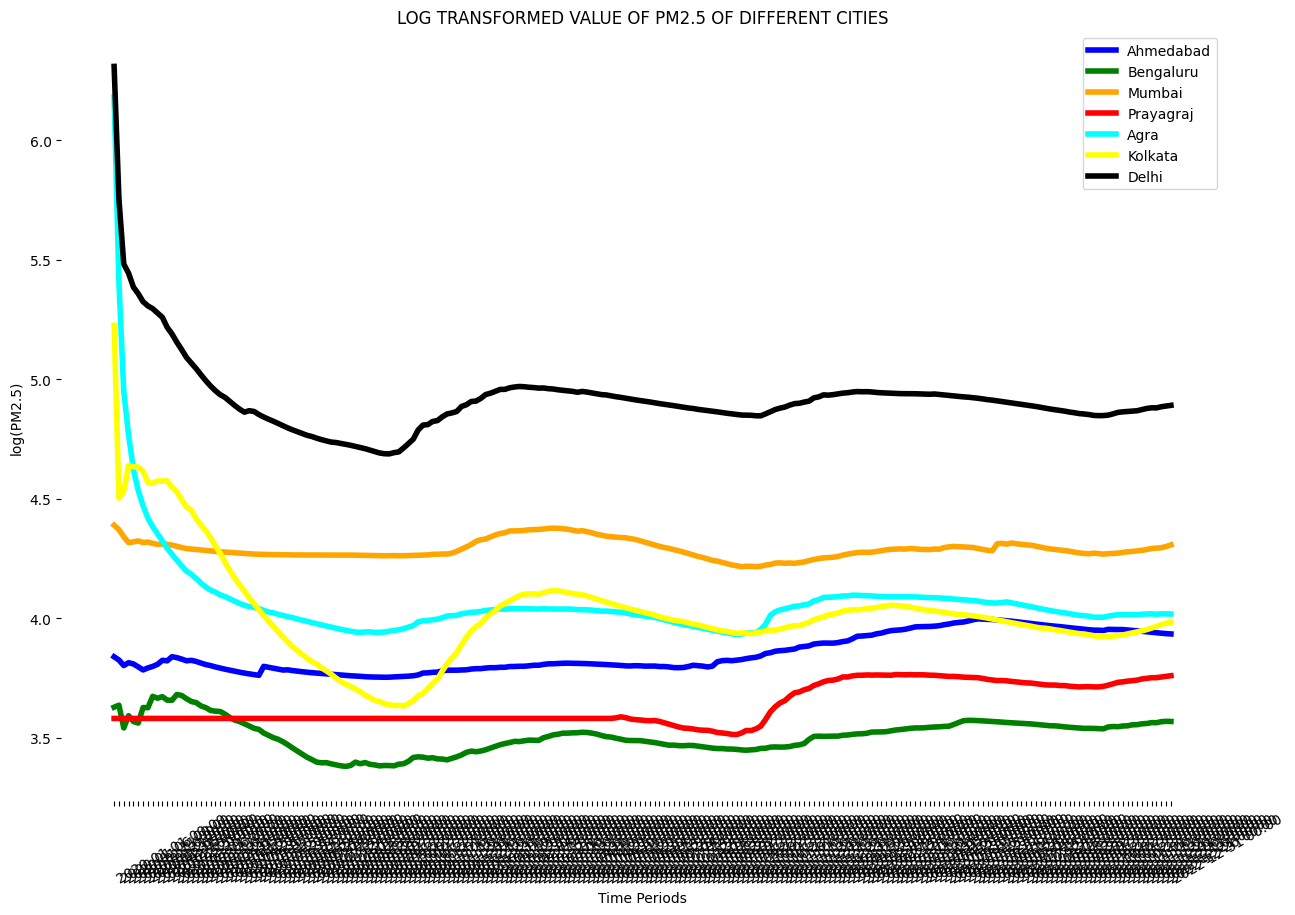

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
fig,ax = plt.subplots(figsize=(15, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 4})

sns.lineplot(x="Time Periods", y=np.log(df_Ahmedabad['PM2.5'].expanding().mean()), data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.lineplot(x="Time Periods", y=np.log(df_Bengaluru['PM2.5'].expanding().mean()), data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.lineplot(x="Time Periods", y=np.log(df_Mumbai['PM2.5'].expanding().mean()), data=df_Mumbai.iloc[::30], color="orange",label = 'Mumbai')
sns.lineplot(x="Time Periods", y=np.log(df_Prayagraj['PM2.5'].expanding().mean()), data=df_Prayagraj.iloc[::30], color="red",label = 'Prayagraj')
sns.lineplot(x="Time Periods", y=np.log(df_Agra['PM2.5'].expanding().mean()), data=df_Agra.iloc[::30], color="cyan",label = 'Agra')
sns.lineplot(x="Time Periods", y=np.log(df_Kolkata['PM2.5'].expanding().mean()), data=df_Kolkata.iloc[::30], color="yellow",label = 'Kolkata')
sns.lineplot(x="Time Periods", y=np.log(df_Delhi['PM2.5'].expanding().mean()), data=df_Delhi.iloc[::30], color="black",label = 'Delhi')


ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('LOG TRANSFORMED VALUE OF PM2.5 OF DIFFERENT CITIES')
ax.set_ylabel('log(PM2.5)')
ax.legend(fontsize=10)

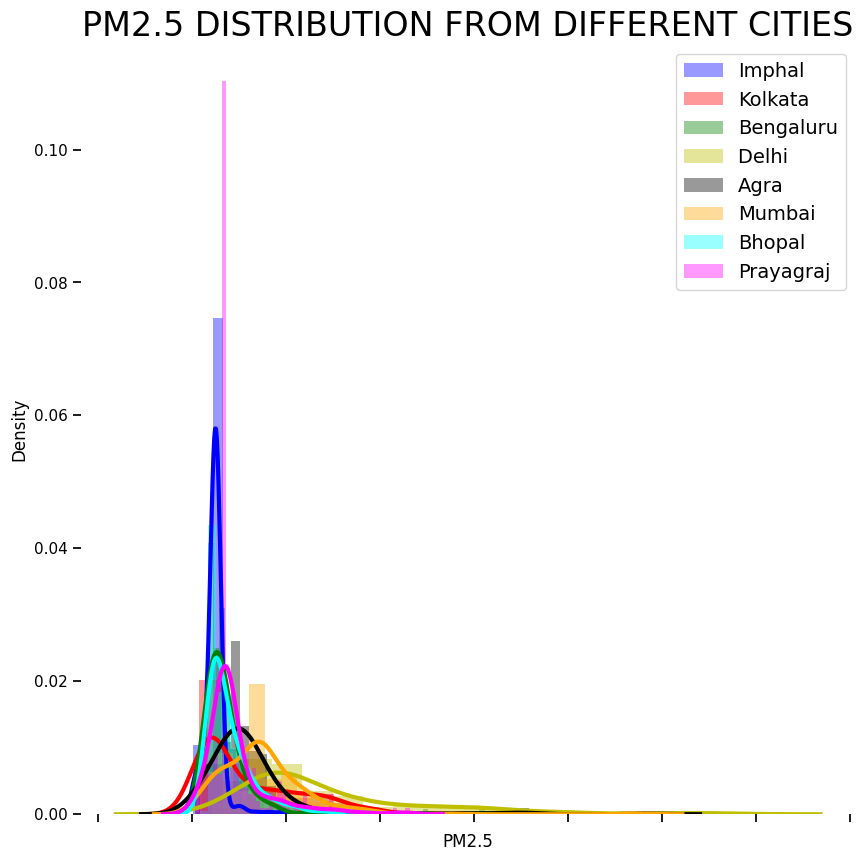

In [27]:
import warnings
warnings.filterwarnings("ignore")
fig,ax = plt.subplots(figsize=(10, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})
labels = [item.get_text() for item in ax.get_xticklabels()]
sns.distplot(df_Imphal['PM2.5'].iloc[::30], color="blue",label = 'Imphal')
sns.distplot(df_Kolkata['PM2.5'].iloc  [::30], color="r",label = 'Kolkata')
sns.distplot(df_Bengaluru['PM2.5'].iloc[::30], color="g",label = 'Bengaluru')
sns.distplot(df_Delhi['PM2.5'].iloc[::30], color="y",label = 'Delhi    ')
sns.distplot(df_Agra['PM2.5'].iloc[::30], color="black",label = 'Agra')
sns.distplot(df_Mumbai['PM2.5'].iloc[::30], color="orange",label = 'Mumbai')
sns.distplot(df_Bhopal['PM2.5'].iloc[::30], color="cyan",label = 'Bhopal')
sns.distplot(df_Prayagraj['PM2.5'].iloc[::30], color="magenta",label = 'Prayagraj')

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('PM2.5 DISTRIBUTION FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

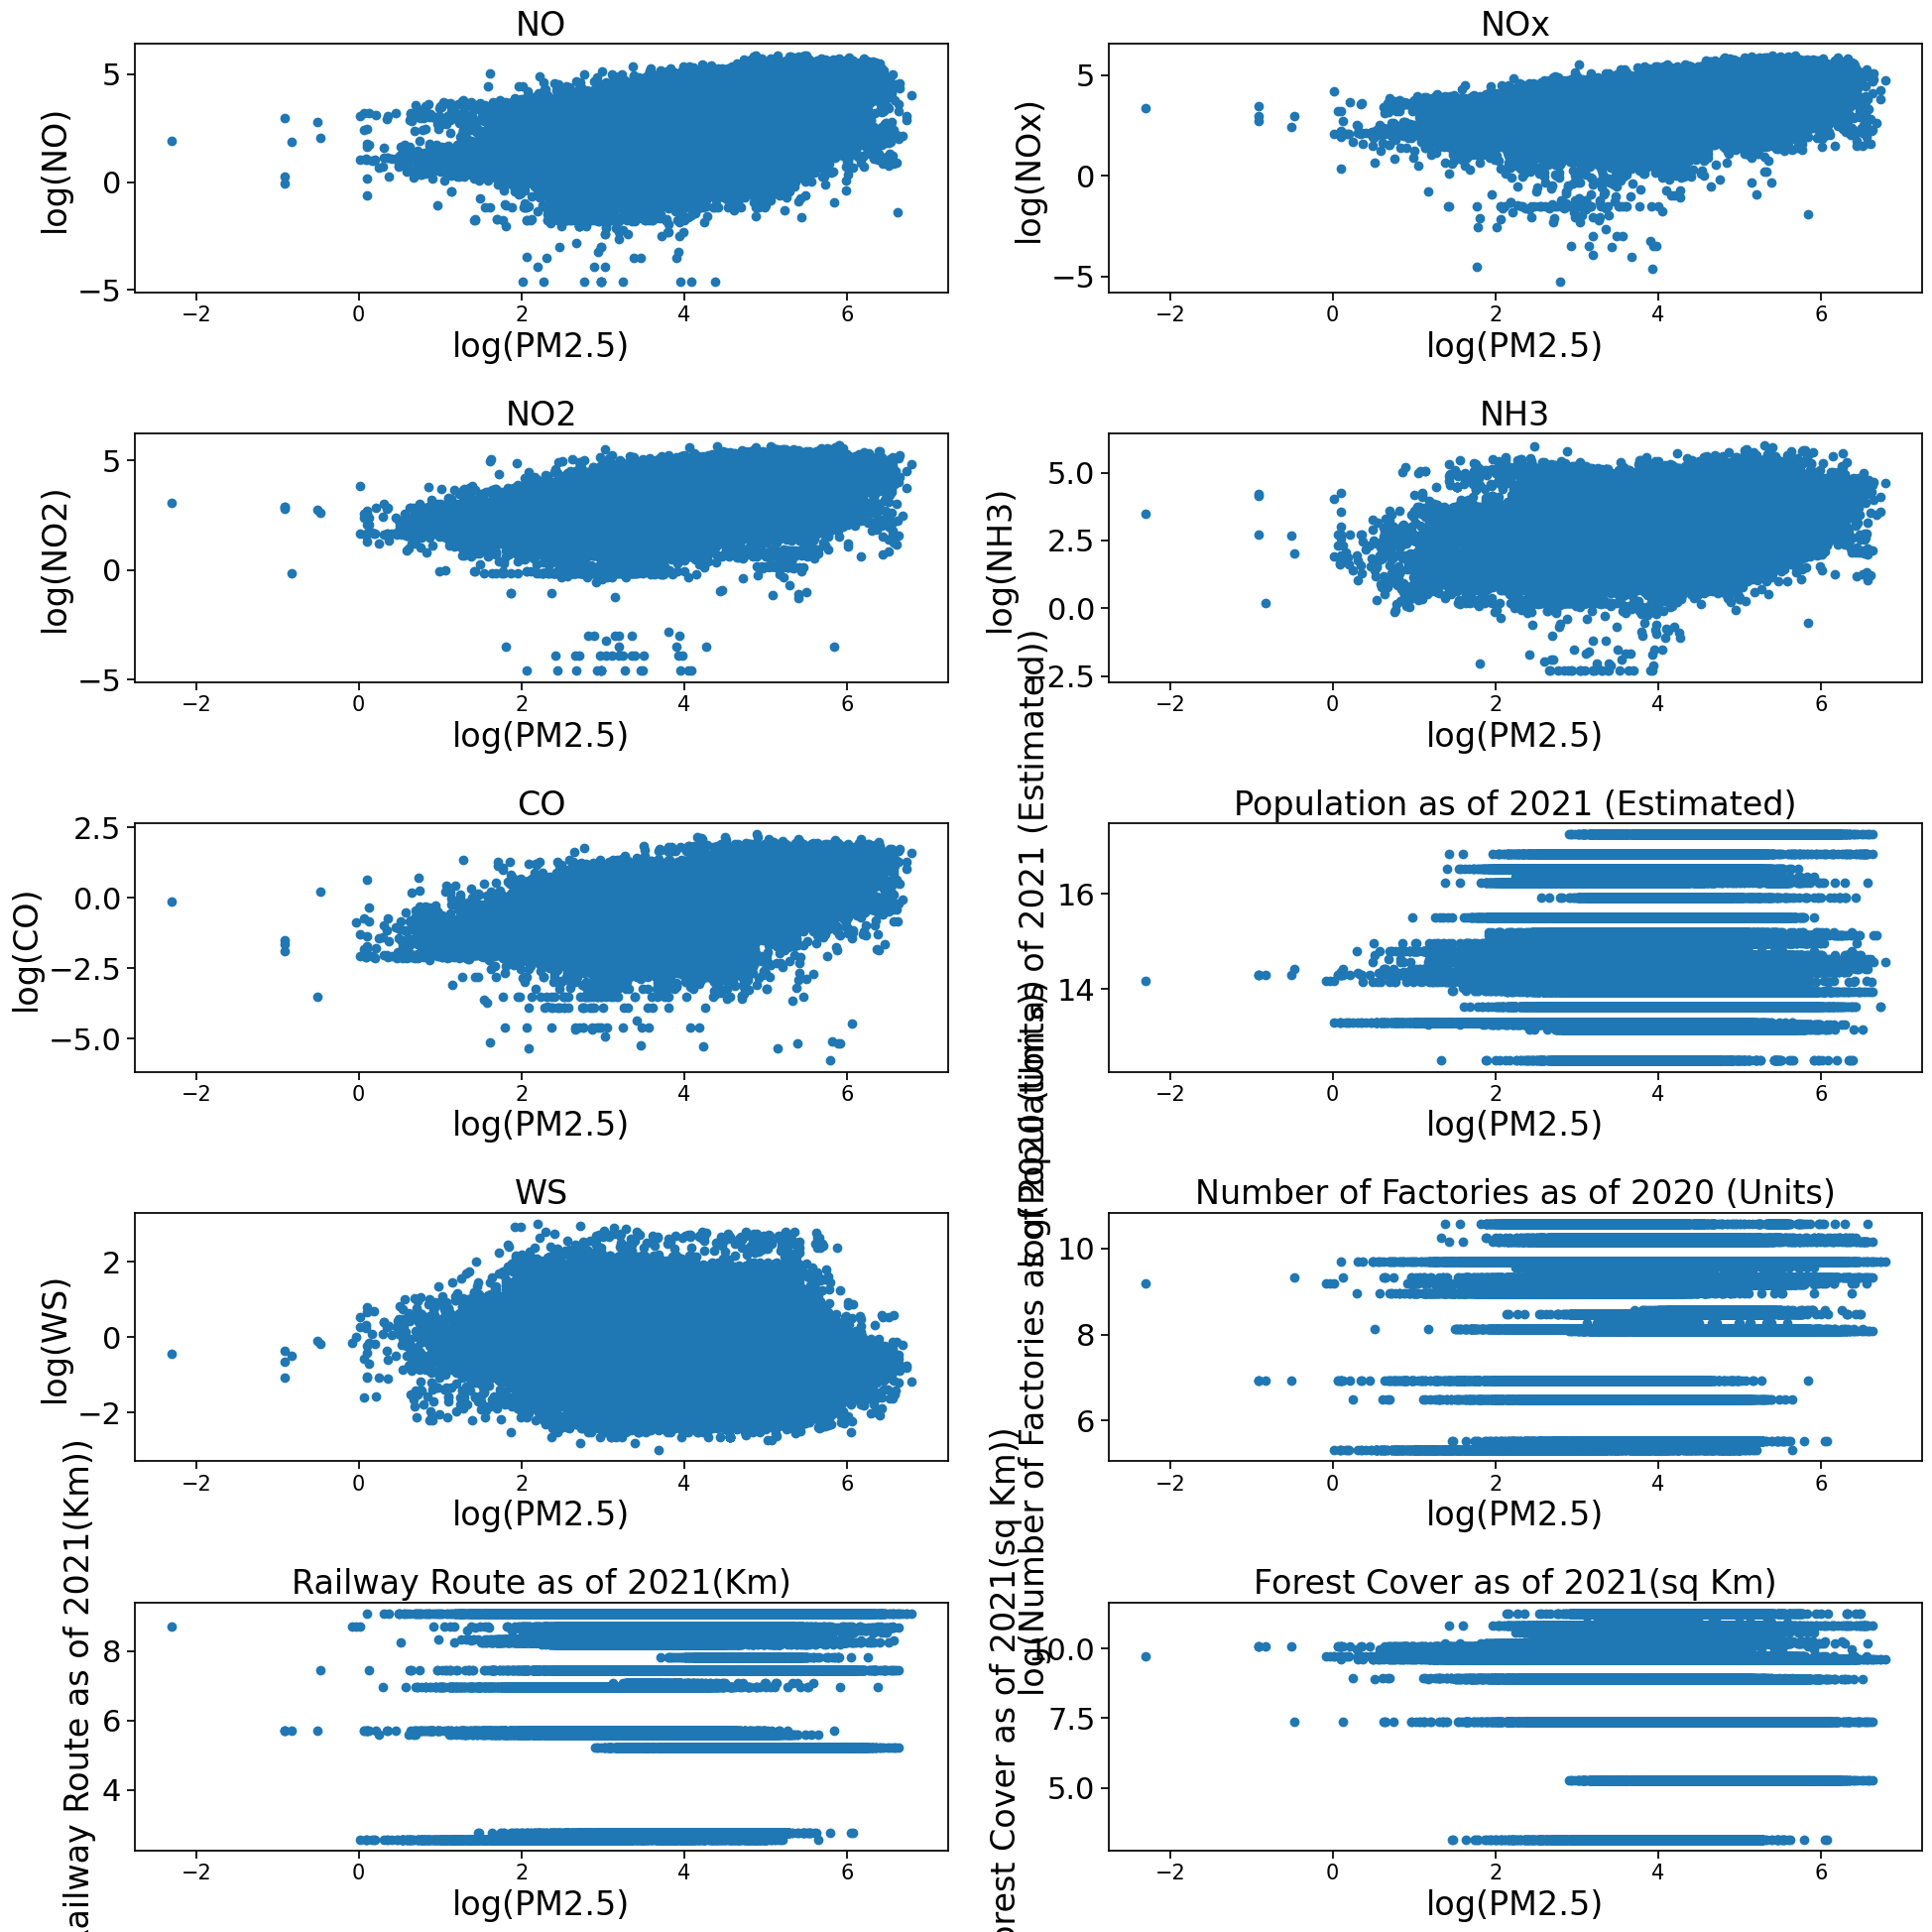

In [28]:
# feature coorelation plot
import pandas as pd
import matplotlib.pyplot as plt

df_preprocess_final["total_cars"] = df_preprocess_final["total_cars"].astype(int)
# select the 10 specific columns and the target feature
cols_of_interest = ['NO', 'NOx', 'NO2', 'NH3', 'CO', 'Population as of 2021 (Estimated)','WS',
                    'Number of Factories as of 2020 (Units)', 'Railway Route as of 2021(Km)',
                    'Forest Cover as of 2021(sq Km)',
                     'SR', 'power_consumed_per_person']
target_feature = 'PM2.5'

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

# loop through the subplots and plot the scatter plots
for i, ax in enumerate(axes.flatten()):
    if i < len(cols_of_interest):
        col = cols_of_interest[i]
        x = np.log((df[target_feature]))
        y = np.log((df[col]))
        ax.scatter(x, y)
        ax.set_xlabel('log({})'.format(target_feature))
        ax.set_ylabel('log({})'.format(col))
        ax.set_title(col)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

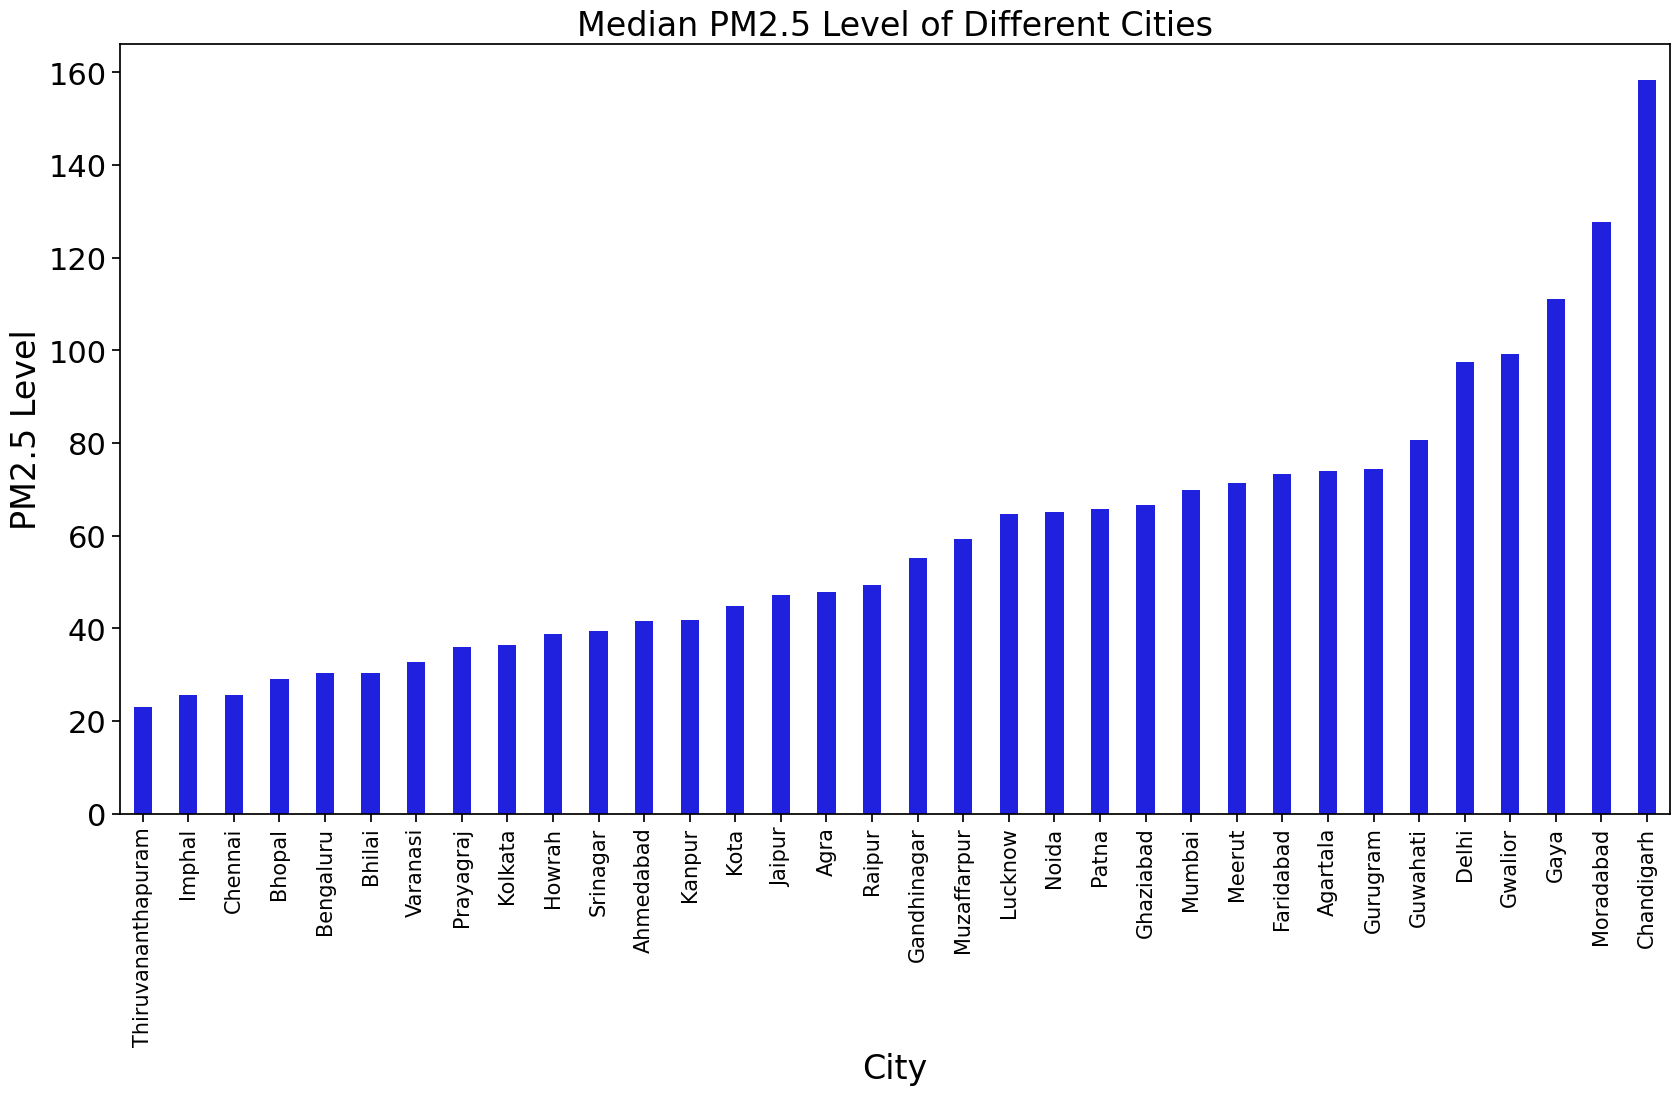

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a new dataframe with mean PM2.5 level of each city
median_pm25 = df_preprocess_final.groupby('City')['PM2.5'].median().reset_index()
median_pm25_sorted = median_pm25.sort_values("PM2.5")
# plot the barplot
plt.figure(figsize=(20,10))
sns.barplot(x='City', y='PM2.5', data=median_pm25_sorted, color='blue', width = 0.4)
plt.title('Median PM2.5 Level of Different Cities')
plt.ylabel('PM2.5 Level')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

In [30]:
# pre covid and post covid 30 days duration 
df_PM2 = df_preprocess_final.pivot(index='Time Periods', columns='City', values='PM2.5')
df_PM2 = df_PM2.fillna(df_PM2.median())
df_PM2.index = pd.to_datetime(df_PM2.index)
df_PM2_2020_05 = df_PM2.loc['2020-05-01 00:00':'2020-05-30 00:00']
df_PM2_2021_05 = df_PM2.loc['2021-05-01 00:00':'2021-05-30 00:00']

df_PM2_2020_05['Month'] = "A"
df_PM2_2021_05['Month'] = "B"

df_PM2_05 = pd.concat([df_PM2_2020_05,df_PM2_2021_05])
# df_PM2_05.head()

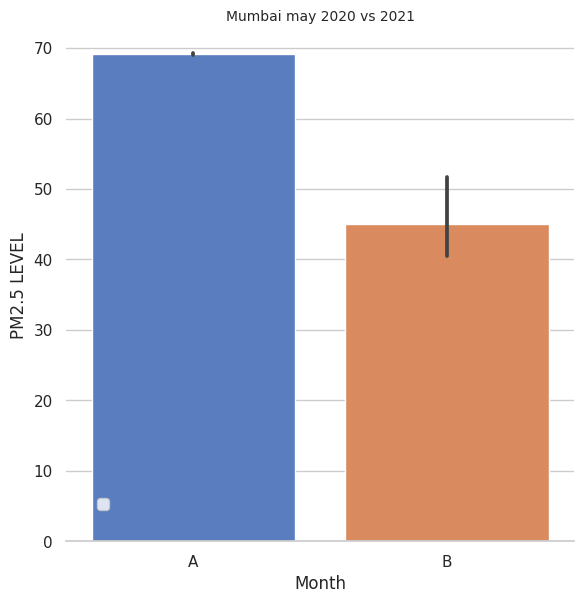

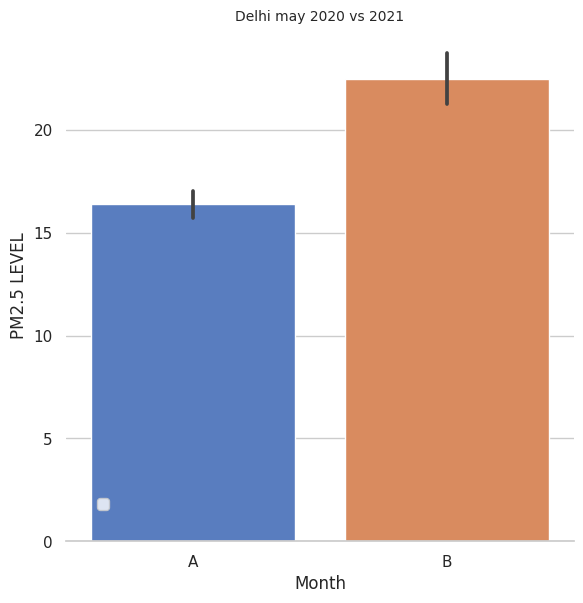

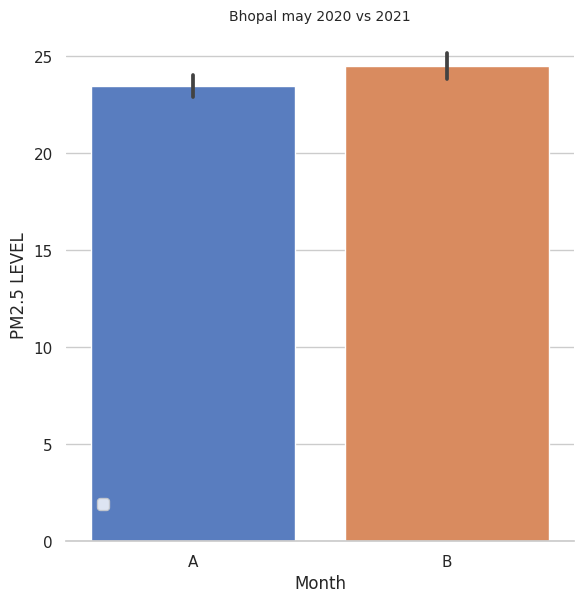

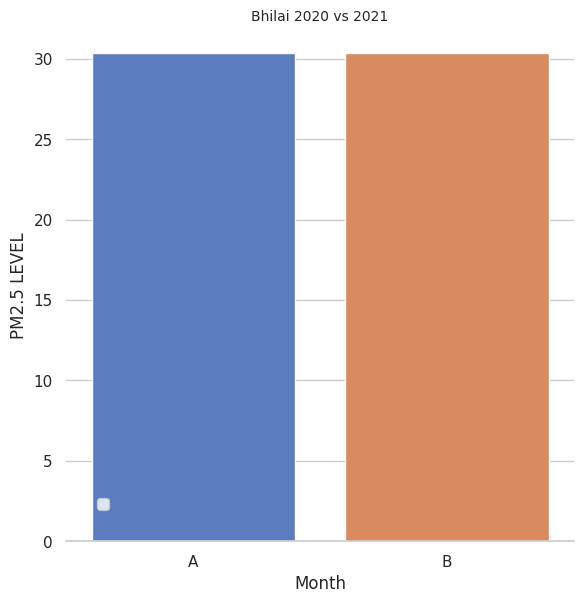

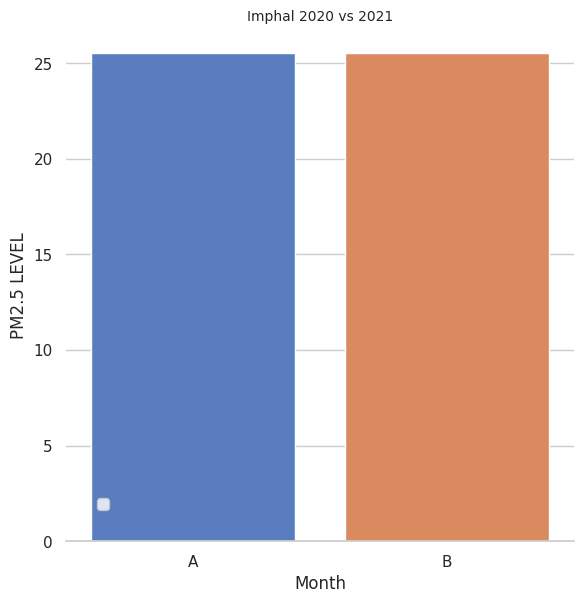

In [31]:
# before covid vs after covid pm2.5 level plot in some cities
sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Mumbai", data=df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Mumbai may 2020 vs 2021",fontsize=10);

sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Kolkata", data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Delhi may 2020 vs 2021",fontsize=10);


sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Bhopal",
                data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Bhopal may 2020 vs 2021",
          fontsize=10);


sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Bhilai",
                data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Bhilai 2020 vs 2021",
          fontsize=10);

sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Imphal",
                data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Imphal 2020 vs 2021",
          fontsize=10);

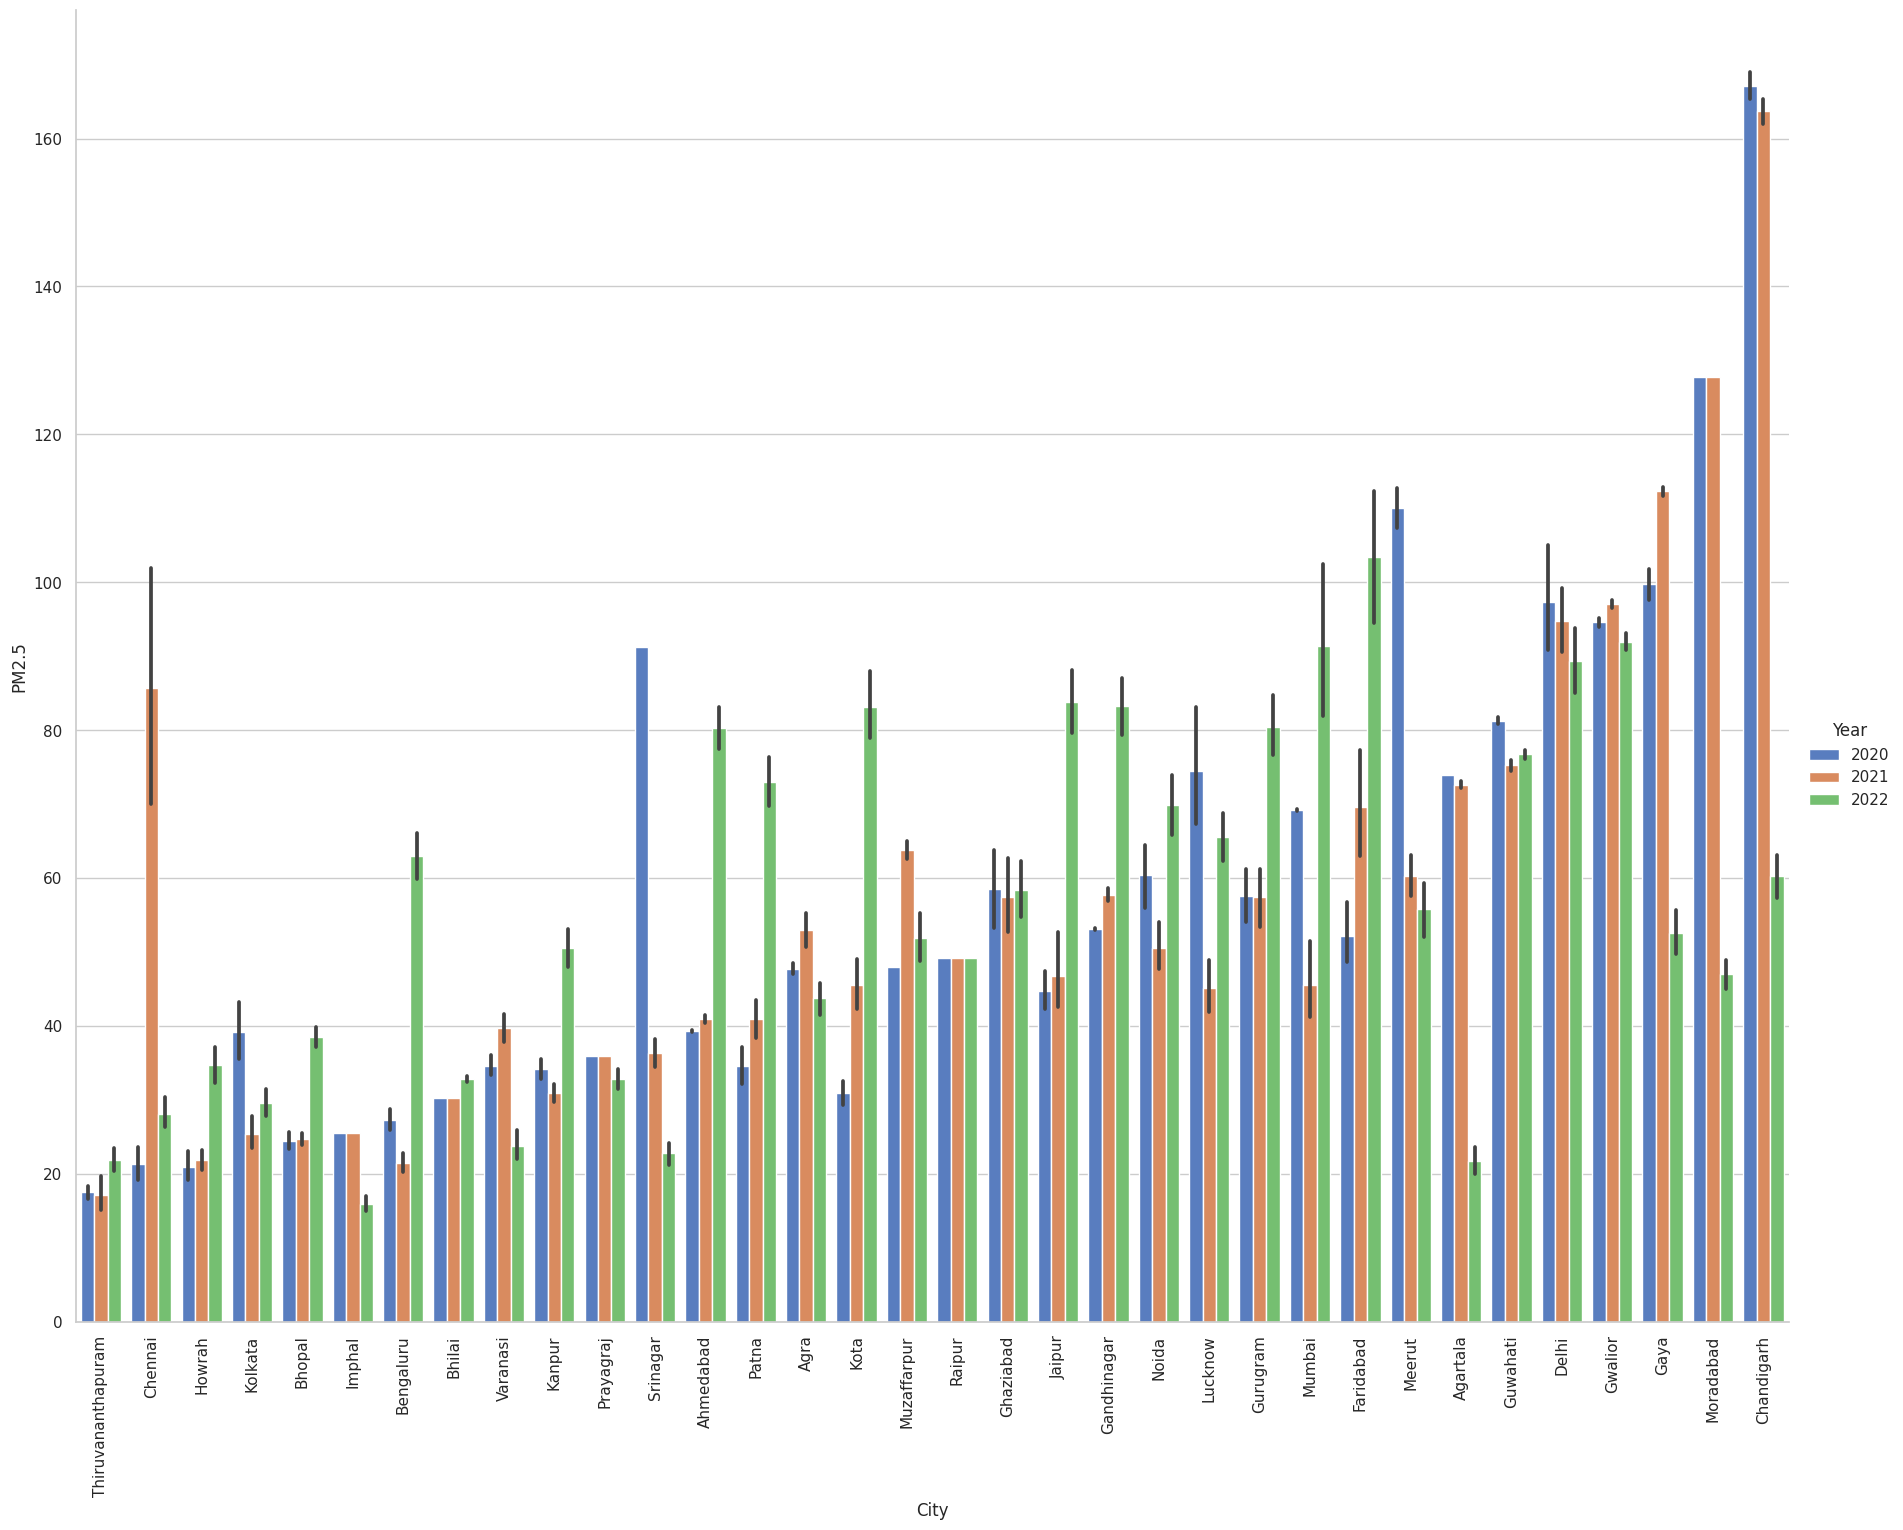

In [33]:
# city wise pm2.5 median value in 2020/21/22 in the month of may
df_covid_comp= pd.read_csv("/kaggle/input/exl-data/EXL_EQ_2023_Dataset.csv",index_col="Time Periods")
df_covid_comp.fillna(df_covid_comp.mean(),inplace=True)
df_covid_comp.index = pd.to_datetime(df_covid_comp.index)

df_2020_05 = df_covid_comp.loc['2020-05-01':'2020-05-30']
df_2021_05 = df_covid_comp.loc['2021-05-01':'2021-05-30']
df_2022_05 = df_covid_comp.loc["2022-05-01":"2022-05-30"]

df_2020_05['Year'] = "2020"
df_2021_05['Year'] = "2021"
df_2022_05["Year"] = "2022"
df_comparison = pd.concat([df_2020_05,df_2021_05,df_2022_05])
# df_comparison.head()
chart = sns.catplot(x="City", y="PM2.5", hue="Year",
                    data=df_comparison, height=14,
                    aspect=1.3, kind="bar", 
                    palette="muted",
                    order=df_comparison.groupby("City")["PM2.5"].median().sort_values().index);
chart.set_xticklabels(rotation=90);

In [34]:
# df_comparison.reset_index(inplace=True)
# df_chart = df_comparison.pivot(index='Time Periods', columns='City', values='PM2.5')
# df_chart[['Ahmedabad','Lucknow', 'Kanpur','Kolkata', 'Mumbai', 'Delhi',
#           'Kota', 'Bhopal', 'Agra', 'Prayagraj']][::1].style.background_gradient(cmap='Reds')

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_by_city(df, city, month, year):
    
#     Plots the relation between the log-transformed feature and time for a specific city and time period.
    
    # Convert the 'time period' column to a pandas datetime object
    df['Time Periods'] = pd.to_datetime(df['Time Periods'], format='%Y-%m-%d %H:%M')

    # Extract the month and year from the 'time period' column
    df['month'] = df['Time Periods'].dt.month
    df['year'] = df['Time Periods'].dt.year

    # Filter the data to include only the specified city and time period
    city_data = df[(df['City'] == city) & (df['month'] == month) & (df['year'] == year)]

    # Apply a log transformation to the 'feature_x' column
    city_data['log_feature_PM2.5'] = np.log(df['PM2.5'])
    
    
        
    '''
    The moving average is commonly used with time series to smooth random short-term
    variations and to highlight other components (trend, season, or cycle) present in
    your data.
    '''
    
    # the cumulative moving average
    city_data["CMA"] = city_data["log_feature_PM2.5"].expanding().mean()
#     city_data["SMA20"] = city_data["log_feature_PM2.5"].rolling(20, min_periods=1).median()
    
    # Extract the timestamps and log-transformed feature values
    timestamps = city_data['Time Periods']
    feature_values = city_data['log_feature_PM2.5']

    # Create a line plot of log-transformed feature values against timestamps
    plt.plot(timestamps, feature_values, linewidth = 2, color = "green")
    plt.title(f'Relation between Log-Transformed PM2.5 vs Time for {city} in {month}/{year}')
    plt.xlabel('Timestamp')
    plt.ylabel('Log-Transformed PM2.5 Value')
    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=90)
    plt.show()

    
    plt.plot(timestamps, city_data["CMA"], linewidth = 2, color = "red")
    plt.title(f'Relation between smoothen Log-Transformed PM2.5 vs Time for {city} in {month}/{year}')
    plt.xlabel('Timestamp')
    plt.ylabel('smoothen Log-Transformed PM2.5 Value')
    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=90)
    plt.show()



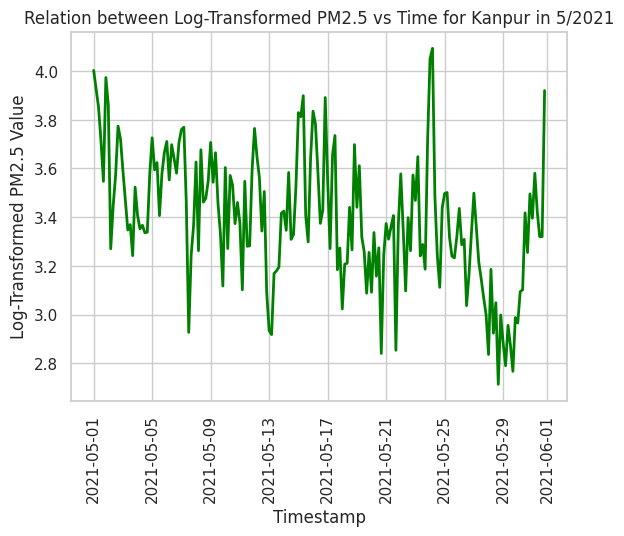

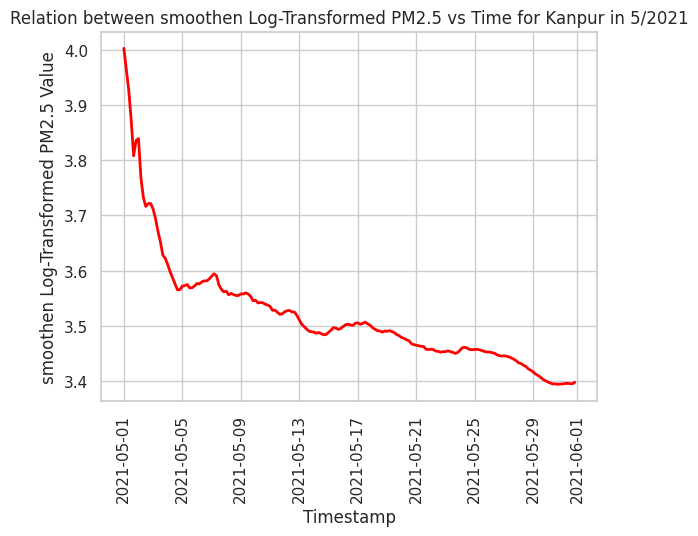

In [37]:
df_processed_copy = df_preprocess_final.copy()
plot_feature_by_city(df_processed_copy, 'Kanpur', 5, 2021)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_by_city(df, cities, month, year):
    """
    Plots the relation between the log-transformed feature and time for multiple cities and a specific time period.
    
    Args:
    df (pandas.DataFrame): DataFrame containing the data.
    cities (list): List of names of the cities to plot.
    month (int): Month of the time period to plot.
    year (int): Year of the time period to plot.
    """
    
    # Convert the 'time period' column to a pandas datetime object
    df['Time Periods'] = pd.to_datetime(df['Time Periods'], format='%Y-%m-%d %H:%M')

    # Apply a log transformation to the 'feature_x' column
    df['log_feature_x'] = np.log(df['PM2.5'])
    

    # Loop through each city and plot the corresponding data
    for city in cities:
        # Filter the data to include only the specified city
        city_data = df[df['City'] == city]

        # Filter the data to include only the specified month and year
        month_data = city_data[(city_data['Time Periods'].dt.month == month) & (city_data['Time Periods'].dt.year == year)]

        # Extract the timestamps and log-transformed feature values for the specified city
        timestamps = month_data['Time Periods']
        month_data["log_pm2.5"] = df["log_feature_x"].rolling(20, min_periods = 1).mean()
        feature_values = month_data["log_pm2.5"]
        # Create a line plot of log-transformed feature values against timestamps
        plt.plot(timestamps, feature_values, label=city, linewidth = 3)

    plt.title(f'Relation between Log-Transformed PM2.5 value vs Time (using SMA) for Multiple Cities in {month}/{year}')
    plt.xlabel('Timestamp')
    plt.ylabel('Log-Transformed PM2.5 Value')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()


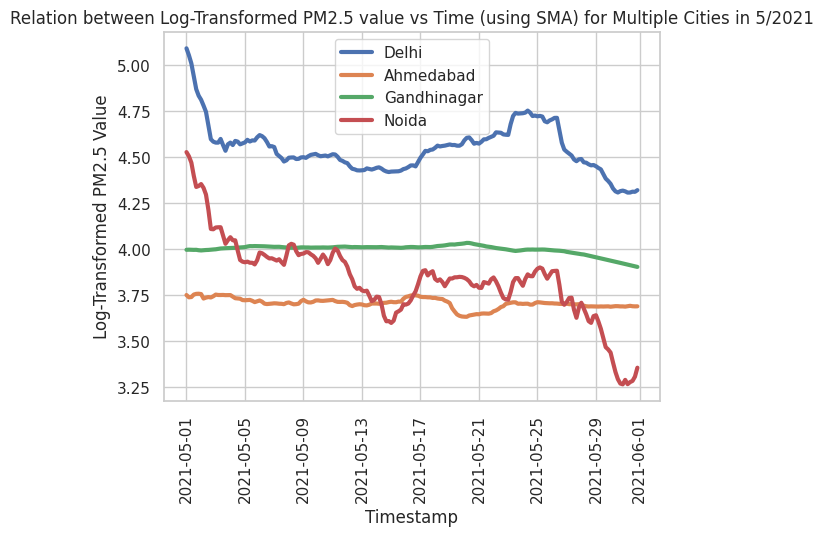

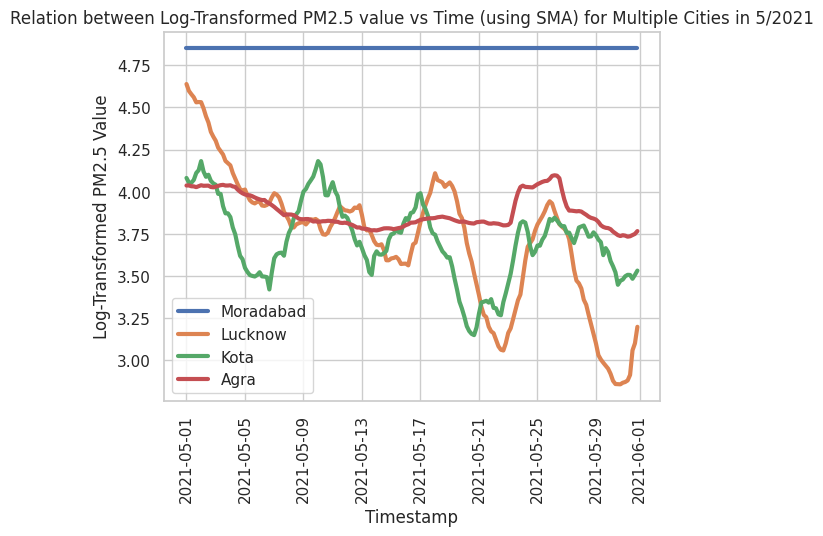

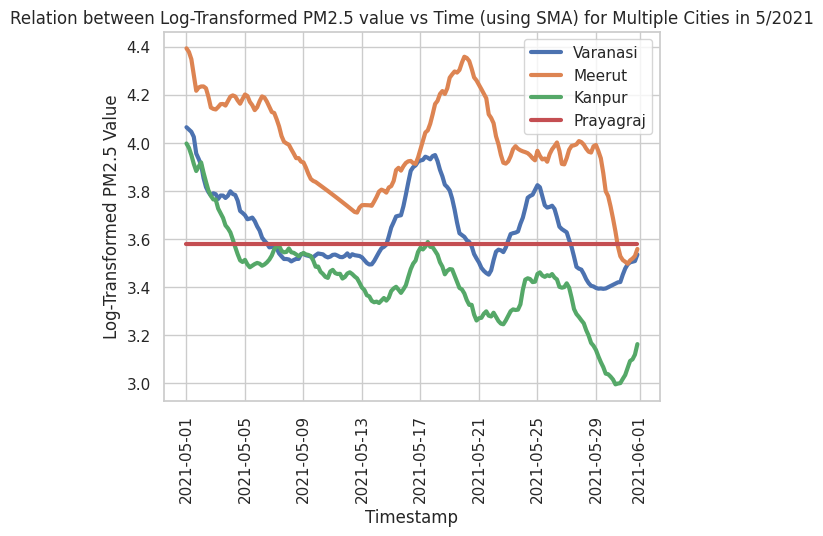

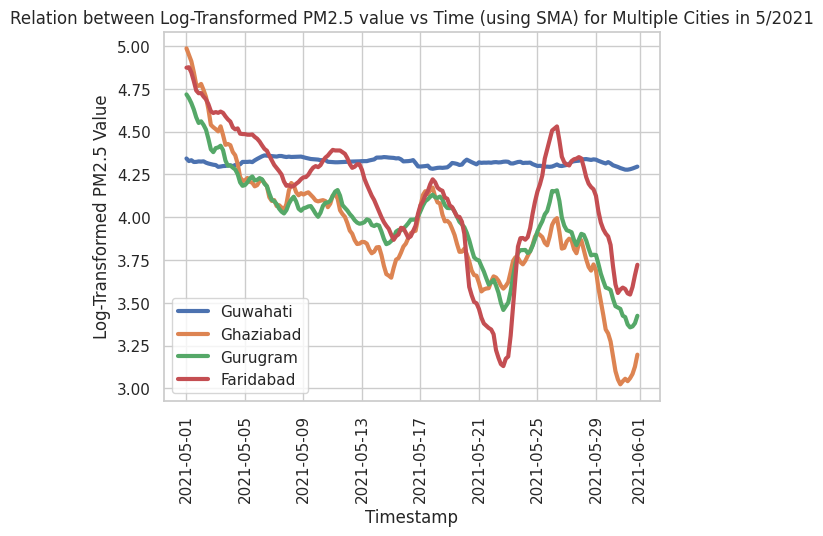

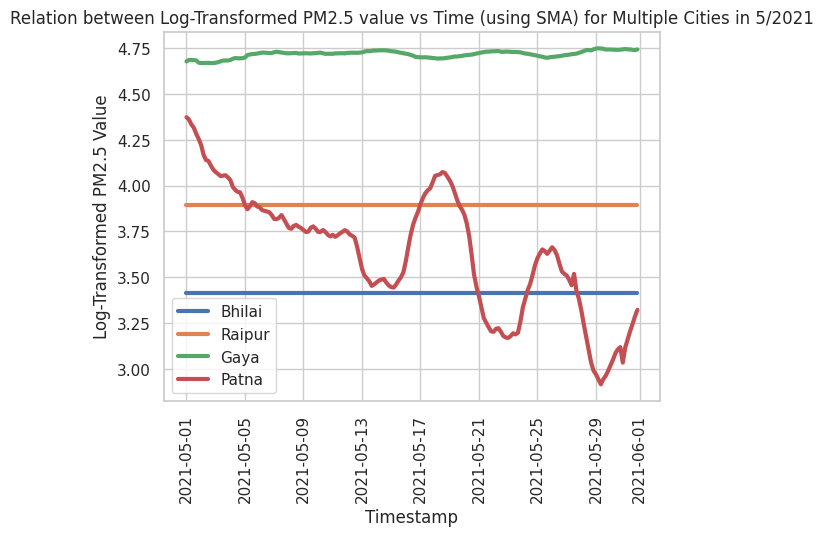

In [39]:
# we can identify multiple cities with flat data
cities1 = ['Delhi', 'Ahmedabad', 'Gandhinagar','Noida']
cities2 = ['Moradabad', 'Lucknow', 'Kota', 'Agra']
cities3 = ['Varanasi','Meerut', 'Kanpur', 'Prayagraj']
cities4 = ['Guwahati', 'Ghaziabad', 'Gurugram', 'Faridabad']
cities5 = ['Bhilai','Raipur', 'Gaya', 'Patna']
plot_feature_by_city(df_processed_copy, cities1, 5, 2021)
plot_feature_by_city(df_processed_copy, cities2, 5, 2021)
plot_feature_by_city(df_processed_copy, cities3, 5, 2021)
plot_feature_by_city(df_processed_copy, cities4, 5, 2021)
plot_feature_by_city(df_processed_copy, cities5, 5, 2021)

In [40]:
df_preprocess_final["month"] = pd.DatetimeIndex(df_preprocess_final["Time Periods"]).month
df_preprocess_final["year"] = pd.DatetimeIndex(df_preprocess_final["Time Periods"]).year
df_preprocess_final.head(3)

PM2.5          NO         NO2         NOx        NH3        SO2  \
0  549.256878  181.010975   91.247522  188.364425  79.707417  10.175812   
1  435.438303  194.247049   79.661701  203.481853  66.258913  11.615925   
2  453.312378  112.499494  121.740909  153.914993  74.356791  10.590183   

         CO   Benzene        WS          SR         AT   City  State  \
0  3.520142  9.827428  0.253857    9.051957   6.750637  Delhi  Delhi   
1  3.464807  9.827428  0.233245   20.697426   5.987430  Delhi  Delhi   
2  2.460498  9.085975  0.805488  258.230668  11.305717  Delhi  Delhi   

   Population as of 2021 (Estimated)  Latitude  Longitude  \
0                           31181377    28.652     77.232   
1                           31181377    28.652     77.232   
2                           31181377    28.652     77.232   

   Total Length of Roads as of 2019(Km)  \
0                                 16170   
1                                 16170   
2                                 16170   

   Length of National Highways as of 2022(Km)  Railway Route as of 2021(Km)  \
0                                         157                           184   
1                                         157                           184   
2                                         157                           184   

   Forest Cover as of 2021(sq Km)  Number of Factories as of 2020 (Units)  \
0                             195                                    3259   
1                             195                                    3259   
2                             195                                    3259   

   Installed Capacity of Power as of 2022(Megawatt)      Time Periods  \
0                                              7617  2020-01-01 00:00   
1                                              7617  2020-01-01 04:00   
2                                              7617  2020-01-01 08:00   

   total_cars  vehicle_per_person  total_road  power_consumed_per_person  \
0      424052              0.0136       16327                   0.000244   
1      424052              0.0136       16327                   0.000244   
2      424052              0.0136       16327                   0.000244   

   month  year  
0      1  2020  
1      1  2020  
2      1  2020

In [42]:
import pandas as pd

# Read in your original dataframe with columns "Time Period", "City", "State", and "pm2.5"
df1 = pd.read_csv("/kaggle/input/exl-data/EXL_EQ_2023_Dataset.csv")

# Convert the "Time Period" column to datetime format
df1["Time Periods"] = pd.to_datetime(df1["Time Periods"], format='%Y-%m-%d %H:%M')

# Extract the month and day from the "Time Period" column
df1["Month"] = df1["Time Periods"].dt.month
df1["Day"] = df1["Time Periods"].dt.day
df1["Year"] = df1["Time Periods"].dt.year

# Group the data by month, day, city, and state, and calculate the median pm2.5 value for each group
grouped = df1.groupby(["Month", "Day", "City", "State"]).median().reset_index()

# Group the data again by month and day, and calculate the median pm2.5 value for each group
monthly = grouped.groupby(["Month", "Day"]).median().reset_index()

# # Print the resulting dataframe
# result = monthly[["Month", "Day", "PM2.5"]]
# result = grouped[["Month","Day","PM2.5","City", "State","CO"]]
# print(result.head(10))

grouped_ = df1.groupby(["Month","Year", "City", "Day","State"]).median().reset_index()
grouped_month_for_each_city = grouped_.groupby(["City","Year","Month"])["PM2.5"].median().reset_index()
grouped_month_for_each_city.head(10)
# print(len(grouped_month_for_each_city))

City  Year  Month      PM2.5
0  Agartala  2020      1  73.946201
1  Agartala  2020      2  73.946201
2  Agartala  2020      3  73.946201
3  Agartala  2020      4  73.946201
4  Agartala  2020      5  73.946201
5  Agartala  2020      6  73.946201
6  Agartala  2020      7  73.946201
7  Agartala  2020      8  73.946201
8  Agartala  2020      9  73.946201
9  Agartala  2020     10  73.946201

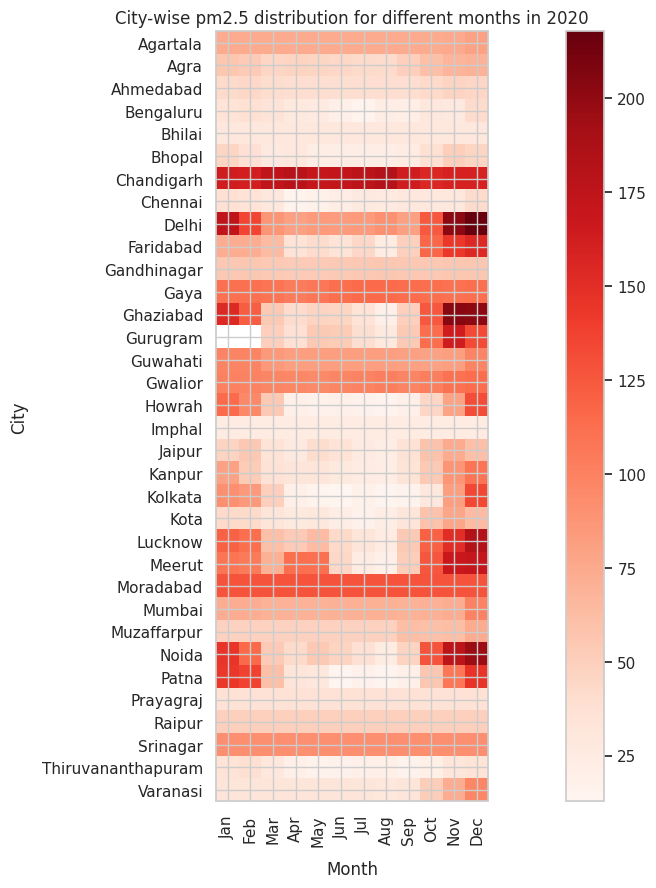

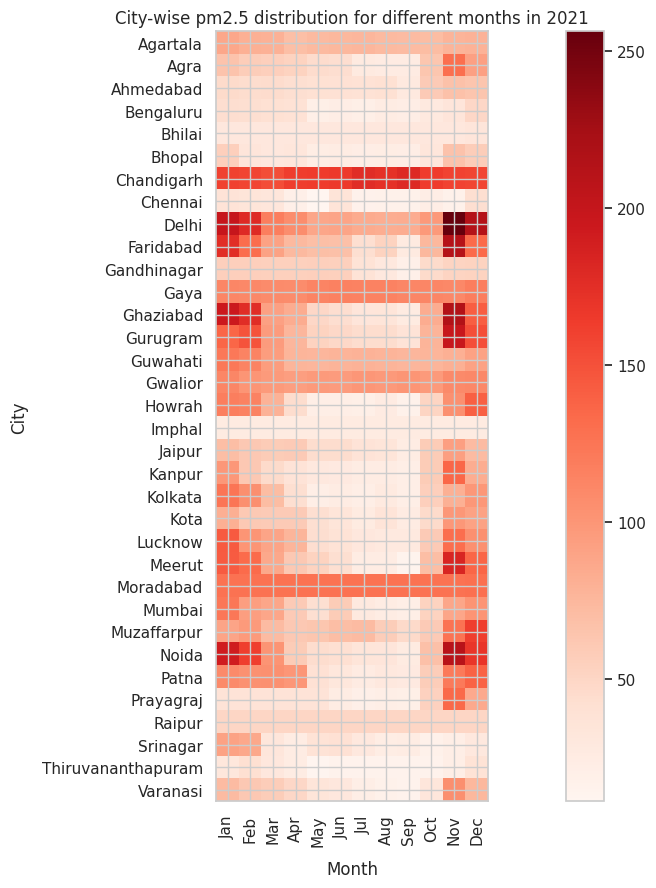

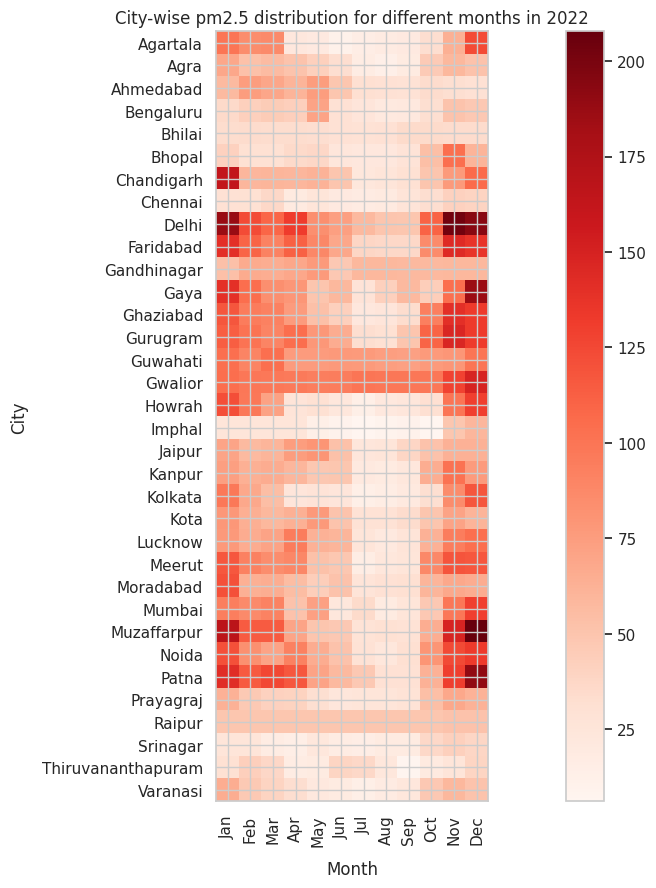

In [43]:
# Loop through the years and create separate plots for each year
for year in df1["Year"].unique():
    # Filter the data for the current year
    df_year = df1[df1["Year"] == year]

    # Group the data by city and month, and calculate the median pm2.5 value for each group
    grouped_by_month = df_year.groupby(["City", "Month"])["PM2.5"].median().reset_index()

    # Pivot the data to create a matrix with cities as rows, months as columns, and pm2.5 values as entries
    pivoted_by_month = grouped_by_month.pivot_table(values="PM2.5", index="City", columns="Month")

    # Plot the pivoted data as a heatmap
    plt.figure(figsize=(20,10))
    plt.title(f"City-wise pm2.5 distribution for different months in {year}")
    plt.xlabel("Month", labelpad=10)
    plt.ylabel("City", labelpad=10)
    plt.imshow(pivoted_by_month, cmap="Reds")
    plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.yticks(range(len(pivoted_by_month)), pivoted_by_month.index)
    plt.colorbar()
    plt.xticks(rotation=90)
    plt.show()

In [44]:
df_coords = df1[['City', 'Latitude', 'Longitude']].drop_duplicates()
# new_df.head()
df_avg = df1.groupby(["City","Year", "Month"])["PM2.5"].mean().reset_index()
# df_avg_31 = df_avg[df_avg['Day'] <= 31]
df_map = pd.merge(df_avg, df_coords, on='City', how='left')
df_map.head()

City  Year  Month      PM2.5  Latitude  Longitude
0  Agartala  2020      1  73.946201    23.836     91.279
1  Agartala  2020      2  73.946201    23.836     91.279
2  Agartala  2020      3  73.946201    23.836     91.279
3  Agartala  2020      4  73.946201    23.836     91.279
4  Agartala  2020      5  73.946201    23.836     91.279

In [45]:
# !pip install folium
import folium
from folium.plugins import HeatMap


def display_on_map(year, month):
    df_heatmap = df_map[(df_map['Year'] == year) & (df_map['Month'] == month)]
    m1 = folium.Map(location=[20.5937, 78.9629], zoom_start=2)
    HeatMap(data=df_heatmap[['Latitude', 'Longitude', 'PM2.5']].values, radius=12, max_zoom=10).add_to(m1)
    display(m1)

display_on_map(2022, 10)
display_on_map(2021, 11)
display_on_map(2020, 6)

In [46]:
df_preprocess['Time Periods'] = pd.to_datetime(df_preprocess['Time Periods'])
cities = list(df_preprocess['City'].unique())
df_ = {}

for i in cities:
    df_[str(i)] = df_preprocess[df_preprocess['City'] == i]
    df_[str(i)] = df_[str(i)].drop(['City'],axis=1)

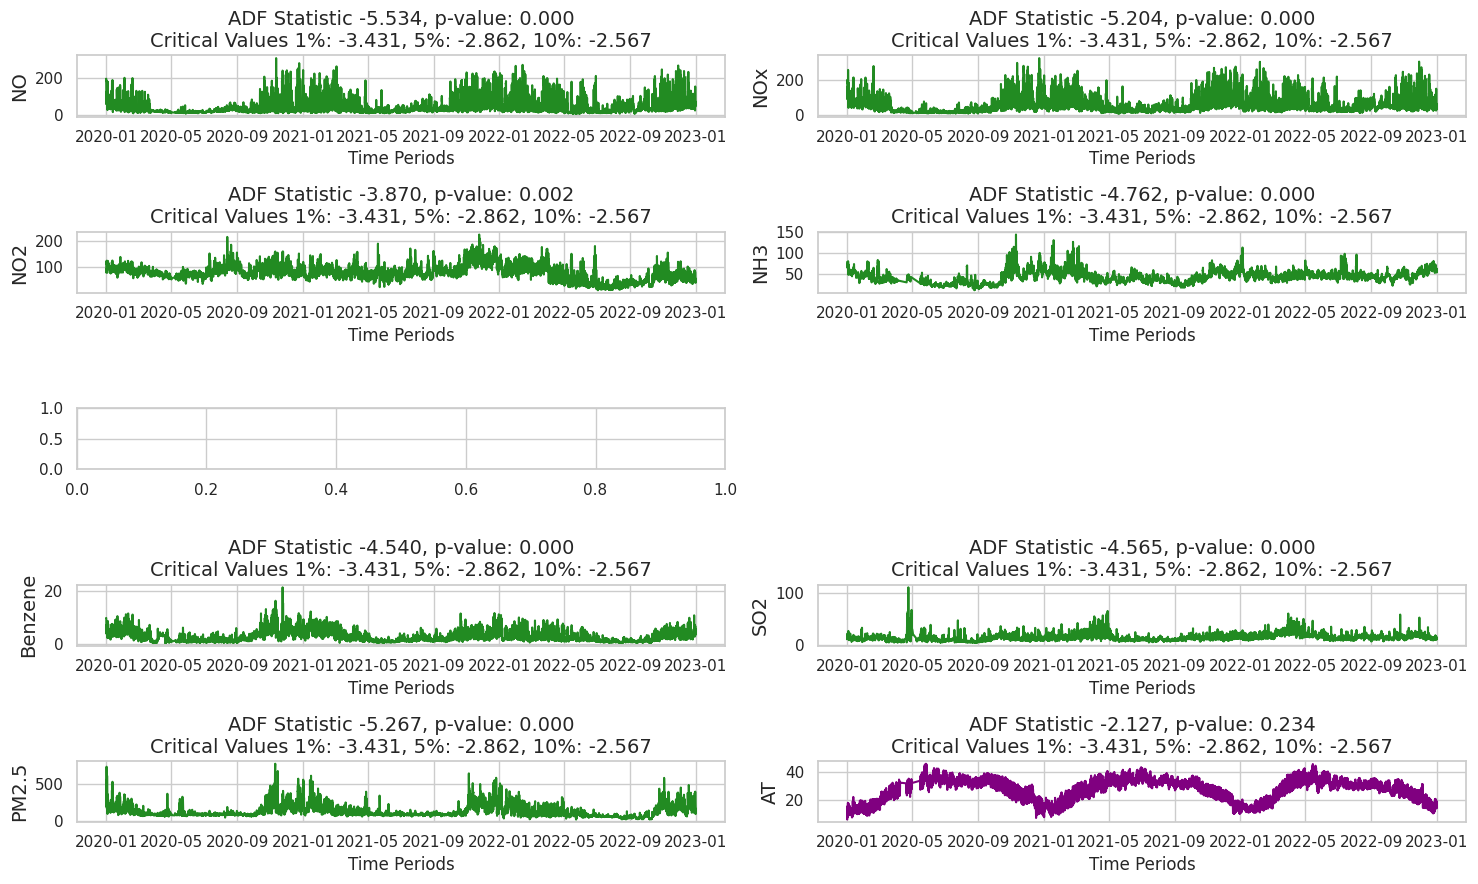

In [48]:
from statsmodels.tsa.stattools import adfuller

df_preprocess = df_["Delhi"]

f, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df_preprocess['Time Periods'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df_preprocess['NO'].values, 'NO', ax[0, 0])
visualize_adfuller_results(df_preprocess['NO2'].values, 'NO2', ax[1, 0])
visualize_adfuller_results(df_preprocess['NOx'].values, 'NOx', ax[0, 1])
visualize_adfuller_results(df_preprocess['NH3'].values, 'NH3', ax[1, 1])
visualize_adfuller_results(df_preprocess['SO2'].values, 'SO2', ax[3, 1])
# visualize_adfuller_results(df_preprocess['CO'].values, 'CO', ax[3, 0])
visualize_adfuller_results(df_preprocess['Benzene'].values, 'Benzene', ax[3, 0])
# visualize_adfuller_results(df_preprocess['WS'].values, 'WS', ax[3, 1])
visualize_adfuller_results(df_preprocess['PM2.5'].values, 'PM2.5', ax[4, 0])
visualize_adfuller_results(df_preprocess['AT'].values, 'AT', ax[4, 1])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='AT', ylabel='Density'>

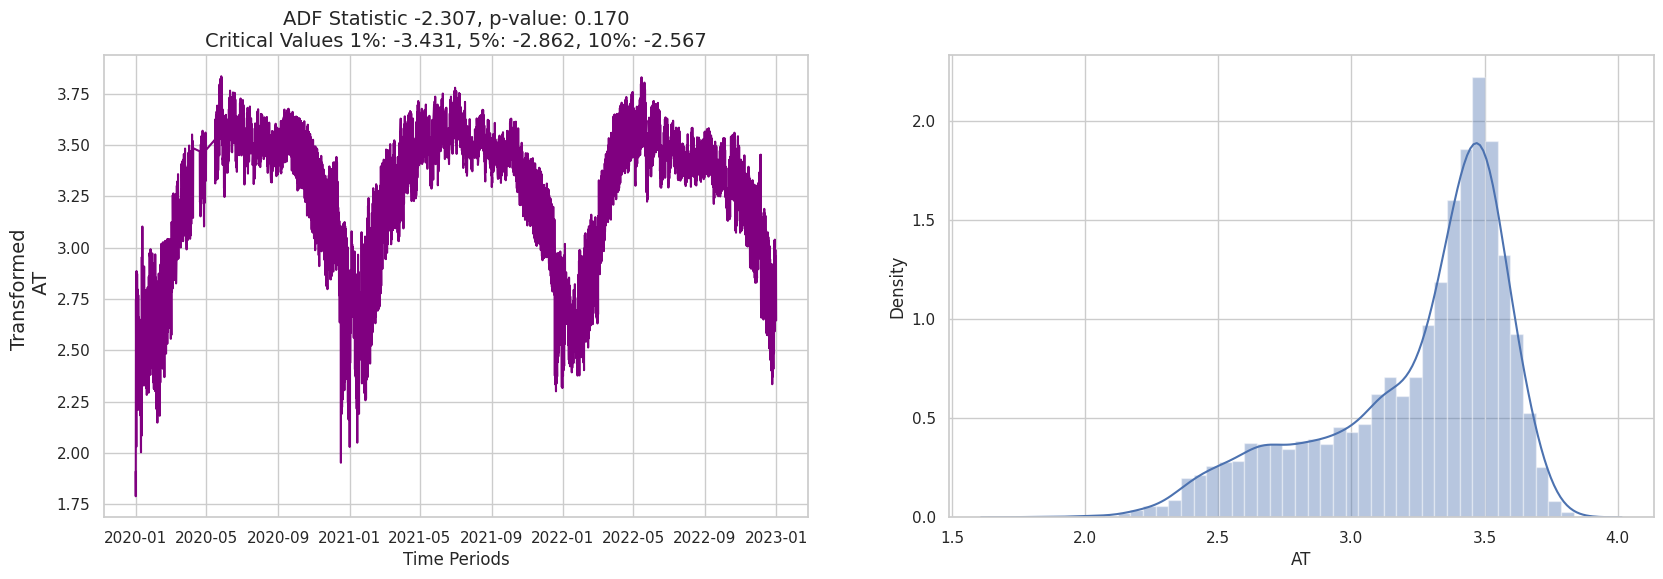

In [49]:
df_["Delhi"]['AT'] = np.log(abs(df_["Delhi"]['AT']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df_["Delhi"]['AT'], 'Transformed \n AT', ax[0])

sns.distplot(df_["Delhi"]['AT'], ax=ax[1])

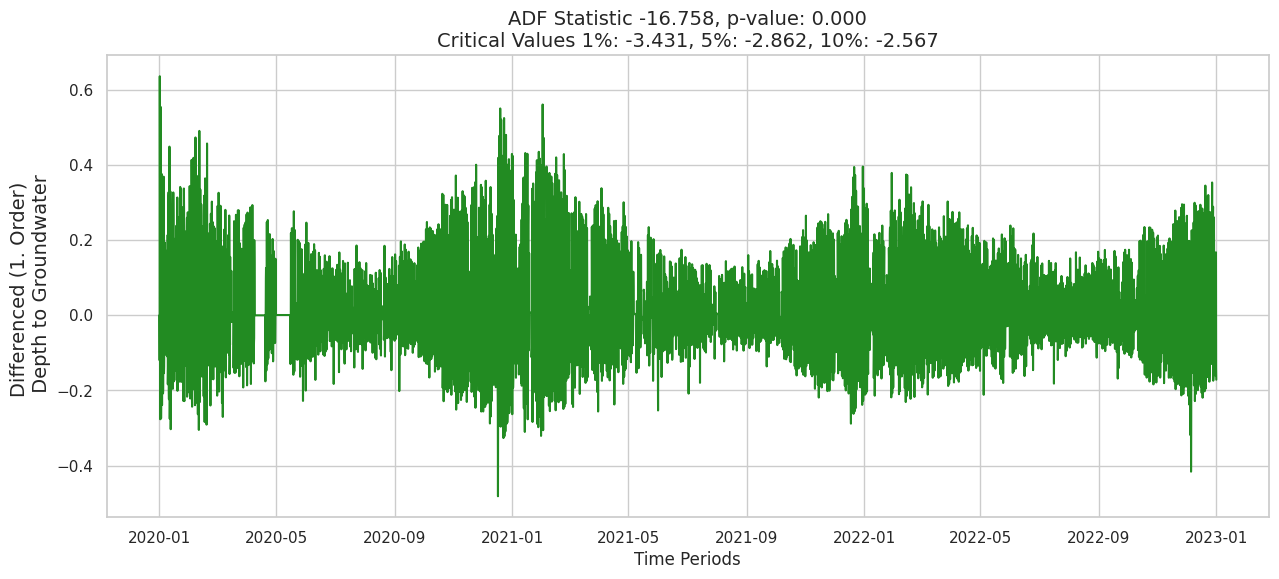

In [50]:
# # First Order Differencing
ts_diff = np.diff(df_["Delhi"]['AT'])
df_["Delhi"]['AT'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df_["Delhi"]['AT'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

In [51]:
df_["Delhi"]['year'] = pd.DatetimeIndex(df_["Delhi"]['Time Periods']).year
df_["Delhi"]['month'] = pd.DatetimeIndex(df_["Delhi"]['Time Periods']).month
df_["Delhi"]['day'] = pd.DatetimeIndex(df_["Delhi"]['Time Periods']).day
df_["Delhi"]['day_of_year'] = pd.DatetimeIndex(df_["Delhi"]['Time Periods']).dayofyear
df_["Delhi"]['week_of_year'] = pd.DatetimeIndex(df_["Delhi"]['Time Periods']).weekofyear
df_["Delhi"]['quarter'] = pd.DatetimeIndex(df_["Delhi"]['Time Periods']).quarter
df_["Delhi"]['season'] = df_["Delhi"]['month'] % 12 // 3 + 1

df_["Delhi"][['Time Periods', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

Time Periods  year  month  day  day_of_year  week_of_year  quarter  \
0 2020-01-01 00:00:00  2020      1    1            1             1        1   
1 2020-01-01 04:00:00  2020      1    1            1             1        1   
2 2020-01-01 08:00:00  2020      1    1            1             1        1   
3 2020-01-01 12:00:00  2020      1    1            1             1        1   
4 2020-01-01 16:00:00  2020      1    1            1             1        1   

   season  
0       1  
1       1  
2       1  
3       1  
4       1

In [52]:
df_delhi = df_["Delhi"]

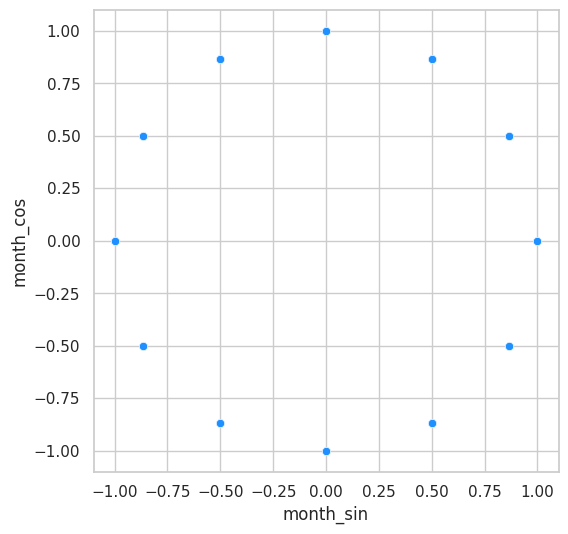

In [53]:
month_in_year = 12
df_delhi['month_sin'] = np.sin(2*np.pi*df_delhi['month']/month_in_year)
df_delhi['month_cos'] = np.cos(2*np.pi*df_delhi['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df_delhi.month_sin, y=df_delhi.month_cos, color='dodgerblue')
plt.show()

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['PM2.5','NO','NO2','NOx','NH3','SO2','CO','Benzene','WS','SR','AT']

for column in core_columns:
    decomp = seasonal_decompose(df_delhi[column], period=52, model='additive', extrapolate_trend='freq')
    df_delhi[f"{column}_trend"] = decomp.trend
    df_delhi[f"{column}_seasonal"] = decomp.seasonal

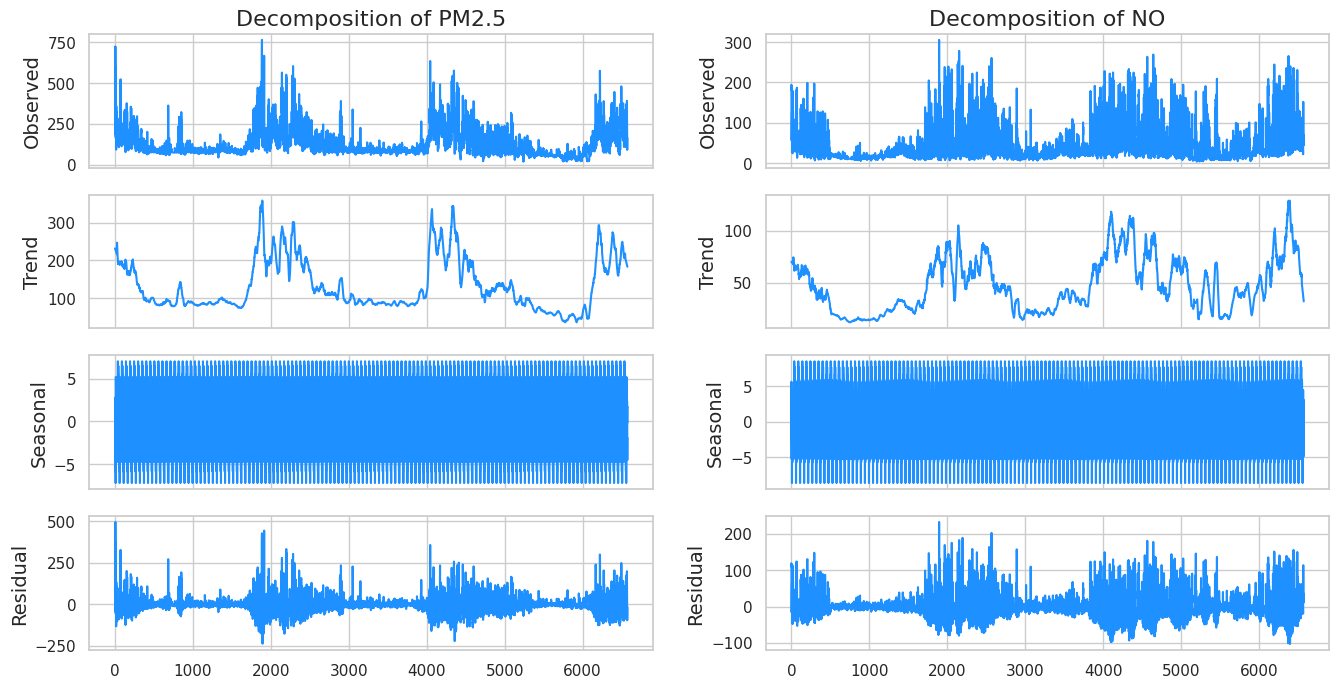

In [55]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['PM2.5', 'NO']):
    
    res = seasonal_decompose(df_delhi[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [56]:
weeks_in_month = 4

for column in core_columns:
    df_delhi[f'{column}_seasonal_shift_b_2m'] = df_delhi[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df_delhi[f'{column}_seasonal_shift_b_1m'] = df_delhi[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df_delhi[f'{column}_seasonal_shift_1m'] = df_delhi[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df_delhi[f'{column}_seasonal_shift_2m'] = df_delhi[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df_delhi[f'{column}_seasonal_shift_3m'] = df_delhi[f'{column}_seasonal'].shift(3 * weeks_in_month)

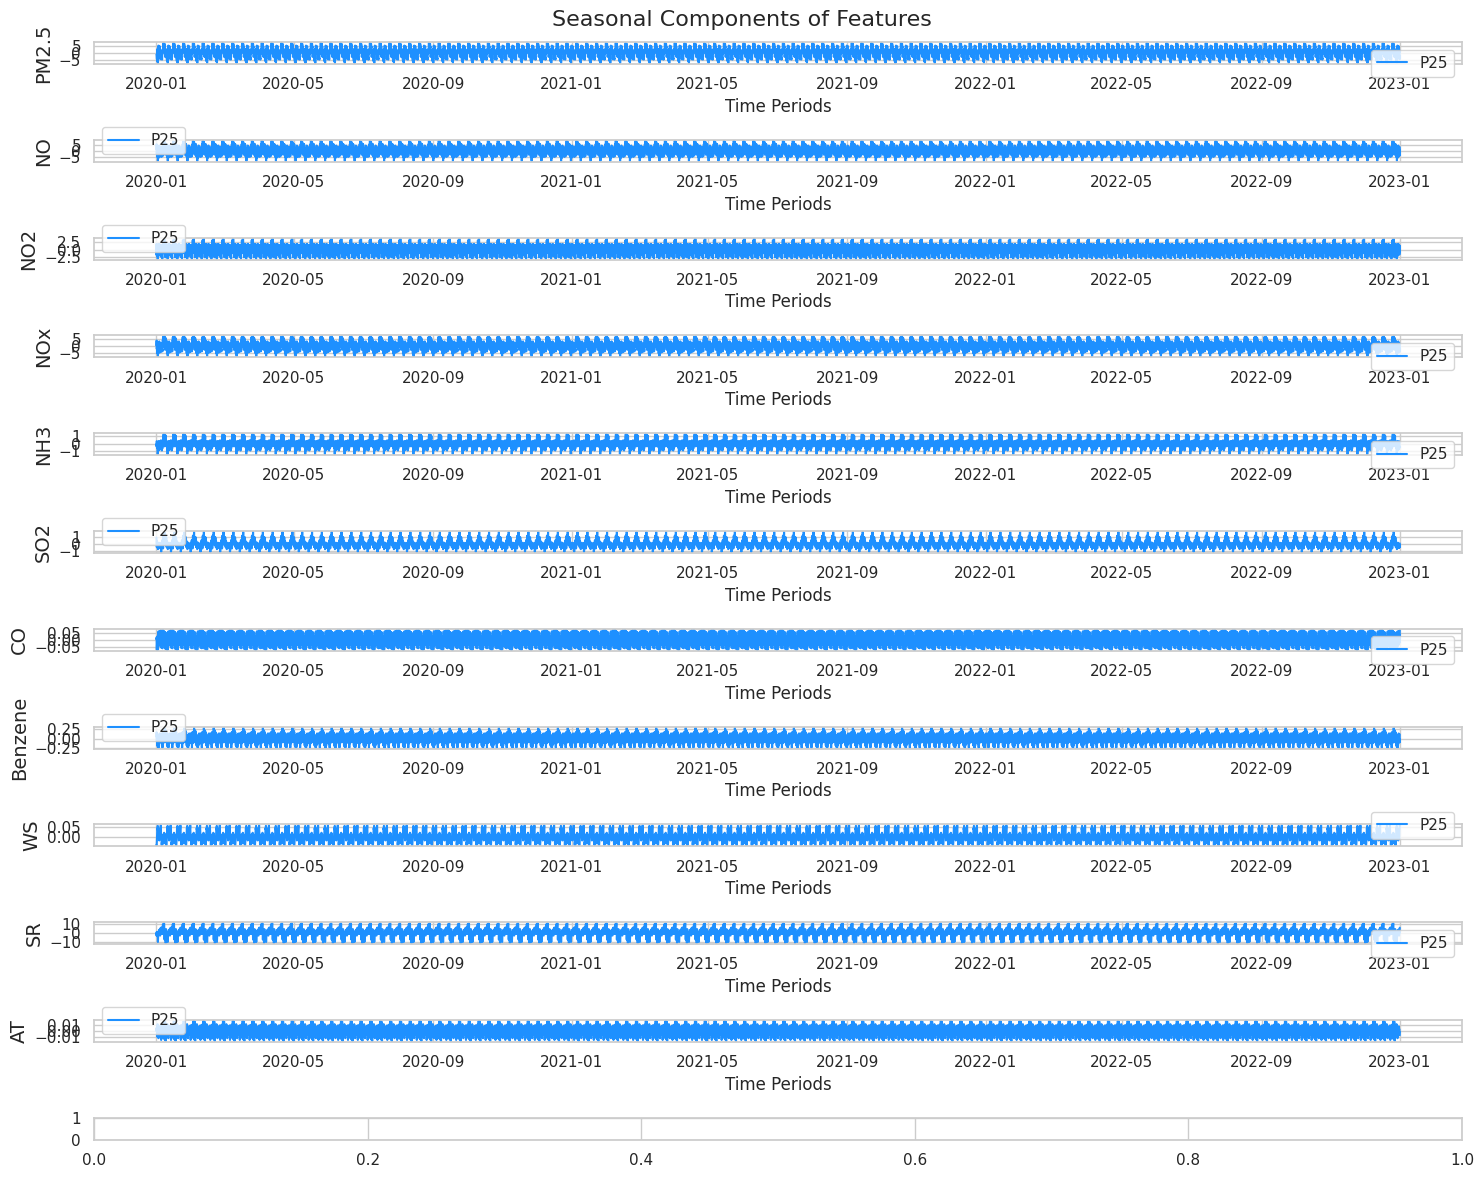

In [57]:
f, ax = plt.subplots(nrows=12, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df_delhi['Time Periods'], y=df_delhi[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
#     ax[i].set_xlim([df_delhi['Time Periods'](2019, 9, 30), df_delhi['Time Periods'](2020, 6, 30)])
    
plt.tight_layout()
plt.show()

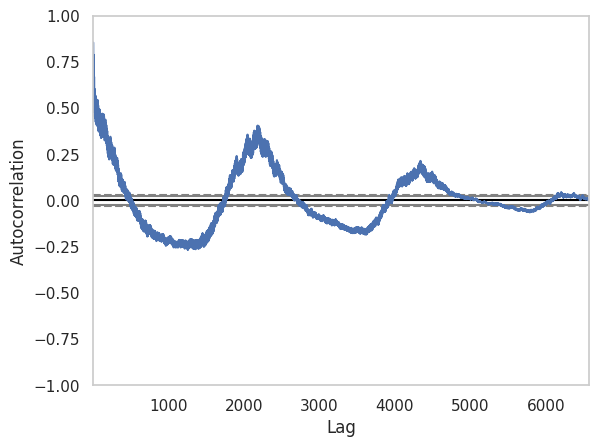

In [61]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_delhi['PM2.5'])
plt.show()

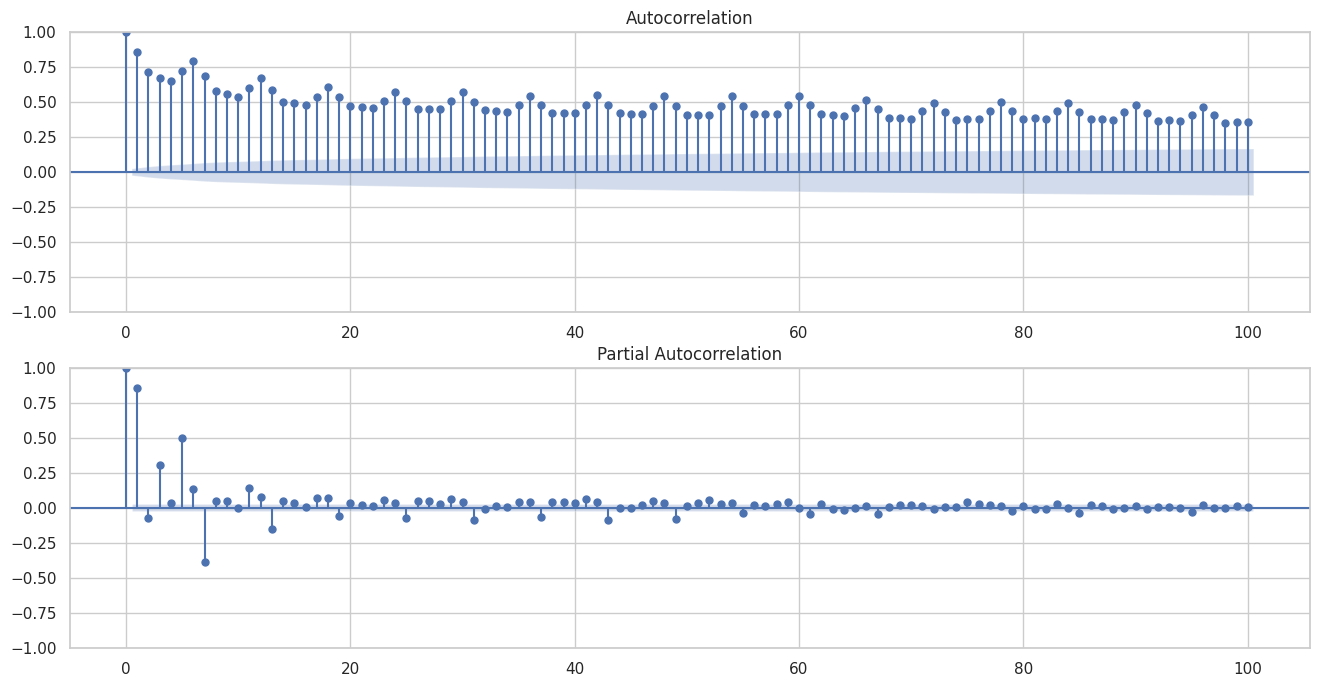

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_delhi['PM2.5'], lags=100, ax=ax[0])
plot_pacf(df_delhi['PM2.5'], lags=100, ax=ax[1])

plt.show()

# Modeling <a class="anchor" id="chapter3"></a>

### FBProhet <a class="anchor" id="section_3_1"></a>

In [63]:
pip install prophet;

Note: you may need to restart the kernel to use updated packages.


In [64]:
df_delhi_prophet = df_delhi[["PM2.5","Time Periods"]]
df_delhi_prophet.rename(columns = {'PM2.5':'y','Time Periods':'ds'}, inplace=True)

In [65]:
from prophet import Prophet

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_delhi_prophet)

17:18:27 - cmdstanpy - INFO - Chain [1] start processing
17:18:29 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2020-01-01 00:00:00  129.235094  136.545093  361.525370   129.235094   
1 2020-01-01 04:00:00  129.217193  122.050568  361.581027   129.217193   
2 2020-01-01 08:00:00  129.199292  123.397128  349.463614   129.199292   
3 2020-01-01 12:00:00  129.181391   89.160792  315.943313   129.181391   
4 2020-01-01 16:00:00  129.163490   90.103384  323.947531   129.163490   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   129.235094      118.717049            118.717049            118.717049   
1   129.217193      115.124331            115.124331            115.124331   
2   129.199292      111.458416            111.458416            111.458416   
3   129.181391       76.054182             76.054182             76.054182   
4   129.163490       82.048437             82.048437             82.048437   

       daily  daily_lower  daily_upper    weekly  weekly_lower  weekly_upper  \
0  11.982894    11.982894    11.982894 -1.444276     -1.444276     -1.444276   
1   9.621519     9.621519     9.621519 -2.194890     -2.194890     -2.194890   
2   6.907344     6.907344     6.907344 -2.659697     -2.659697     -2.659697   
3 -27.949249   -27.949249   -27.949249 -2.714436     -2.714436     -2.714436   
4 -21.867317   -21.867317   -21.867317 -2.303481     -2.303481     -2.303481   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  108.178430    108.178430    108.178430                   0.0   
1  107.697703    107.697703    107.697703                   0.0   
2  107.210769    107.210769    107.210769                   0.0   
3  106.717867    106.717867    106.717867                   0.0   
4  106.219235    106.219235    106.219235                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  247.952143  
1                         0.0                         0.0  244.341524  
2                         0.0                         0.0  240.657708  
3                         0.0                         0.0  205.235573  
4                         0.0                         0.0  211.211927

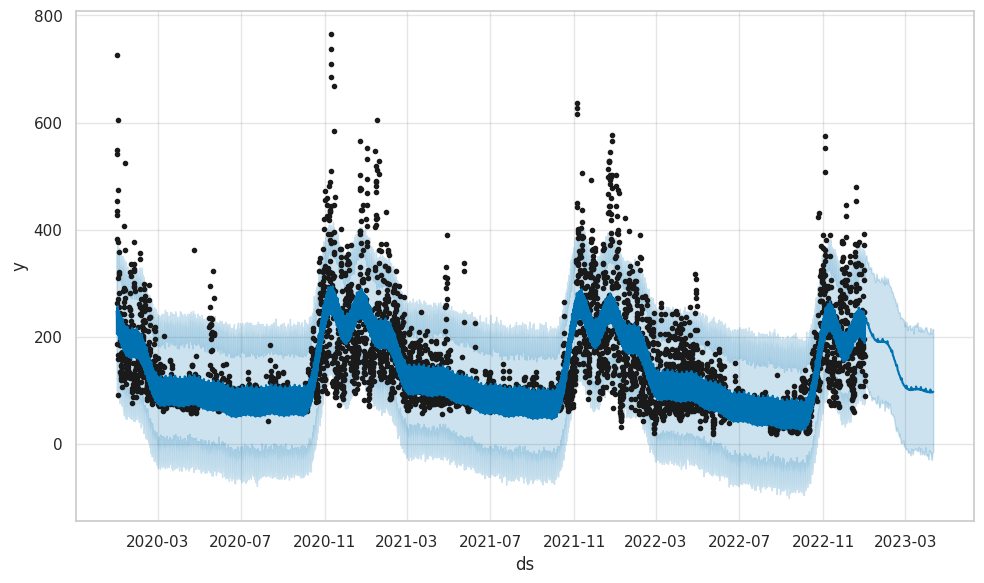

In [67]:
plot1 = m.plot(forecast)

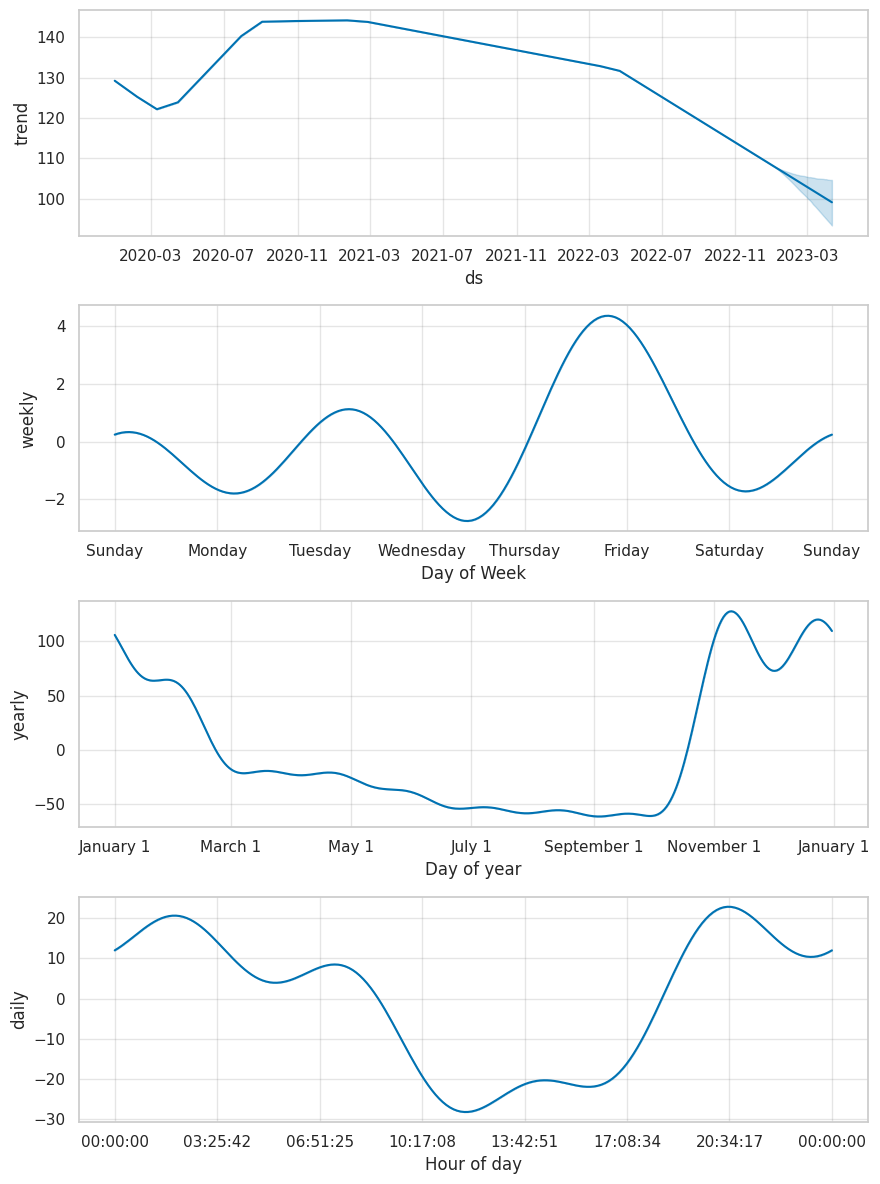

In [68]:
plt2 = m.plot_components(forecast)

In [69]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.tail()

  0%|          | 0/1 [00:00<?, ?it/s]

17:18:39 - cmdstanpy - INFO - Chain [1] start processing
17:18:40 - cmdstanpy - INFO - Chain [1] done processing


ds        yhat  yhat_lower  yhat_upper           y  \
2185 2022-12-31 04:00:00  303.452207  180.381827  432.711042  196.175491   
2186 2022-12-31 08:00:00  304.841932  183.857048  437.132716  116.911632   
2187 2022-12-31 12:00:00  268.605522  137.635055  386.762315   90.348195   
2188 2022-12-31 16:00:00  274.710680  149.121098  396.494937  128.424548   
2189 2022-12-31 20:00:00  315.310245  195.201086  454.943573  163.290713   

                  cutoff  
2185 2021-12-31 20:00:00  
2186 2021-12-31 20:00:00  
2187 2021-12-31 20:00:00  
2188 2021-12-31 20:00:00  
2189 2021-12-31 20:00:00

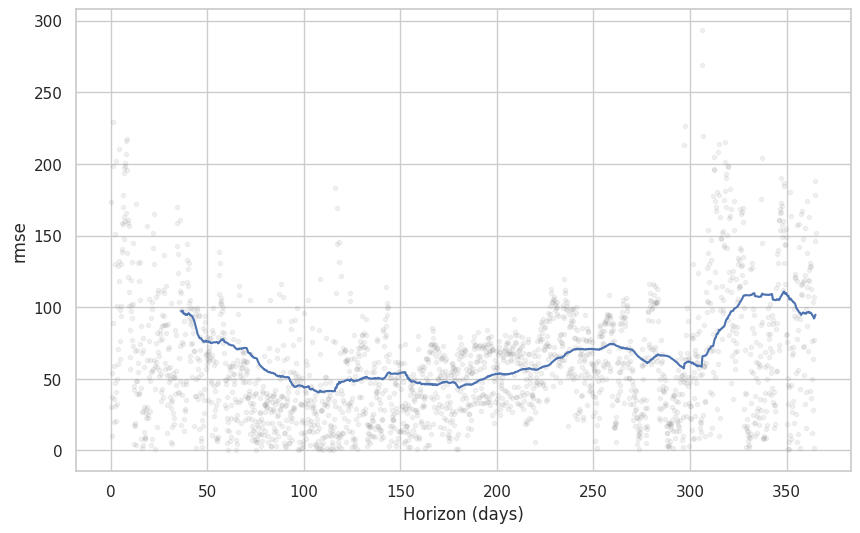

In [70]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### ThymeBoost <a class="anchor" id="section_3_2"></a>

In [ ]:
# pip install ThymeBoost --upgrade;

In [ ]:
# df_['Kolkata'].index = df_['Kolkata']['Time Periods']
# y = df_['Kolkata']['PM2.5']

In [ ]:
# test_len = int(len(y) * 0.3)
# al_train, al_test = y.iloc[:-test_len], y.iloc[-test_len:]

In [ ]:
# from ThymeBoost import ThymeBoost as tb

# boosted_model = tb.ThymeBoost(verbose=0)
# output = boosted_model.autofit(al_train)
# #                                ,seasonal_period=12)
# predicted_output = boosted_model.predict(output, len(al_test))
# tb_mae = np.mean(np.abs(al_test - predicted_output['predictions']))
# tb_rmse = (np.mean((al_test - predicted_output['predictions'])**2))**.5
# tb_mape = np.sum(np.abs(predicted_output['predictions'] - al_test)) / (np.sum((np.abs(al_test))))

In [ ]:
# predicted_output.tail()

In [ ]:
# tb_rmse

### Custom Cross Validation split <a class="anchor" id="section_3_3"></a>

In [87]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

df_['Kolkata'].index = df_['Kolkata']['Time Periods']

X = df_['Kolkata']['Time Periods']
y = df_['Kolkata']['PM2.5']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

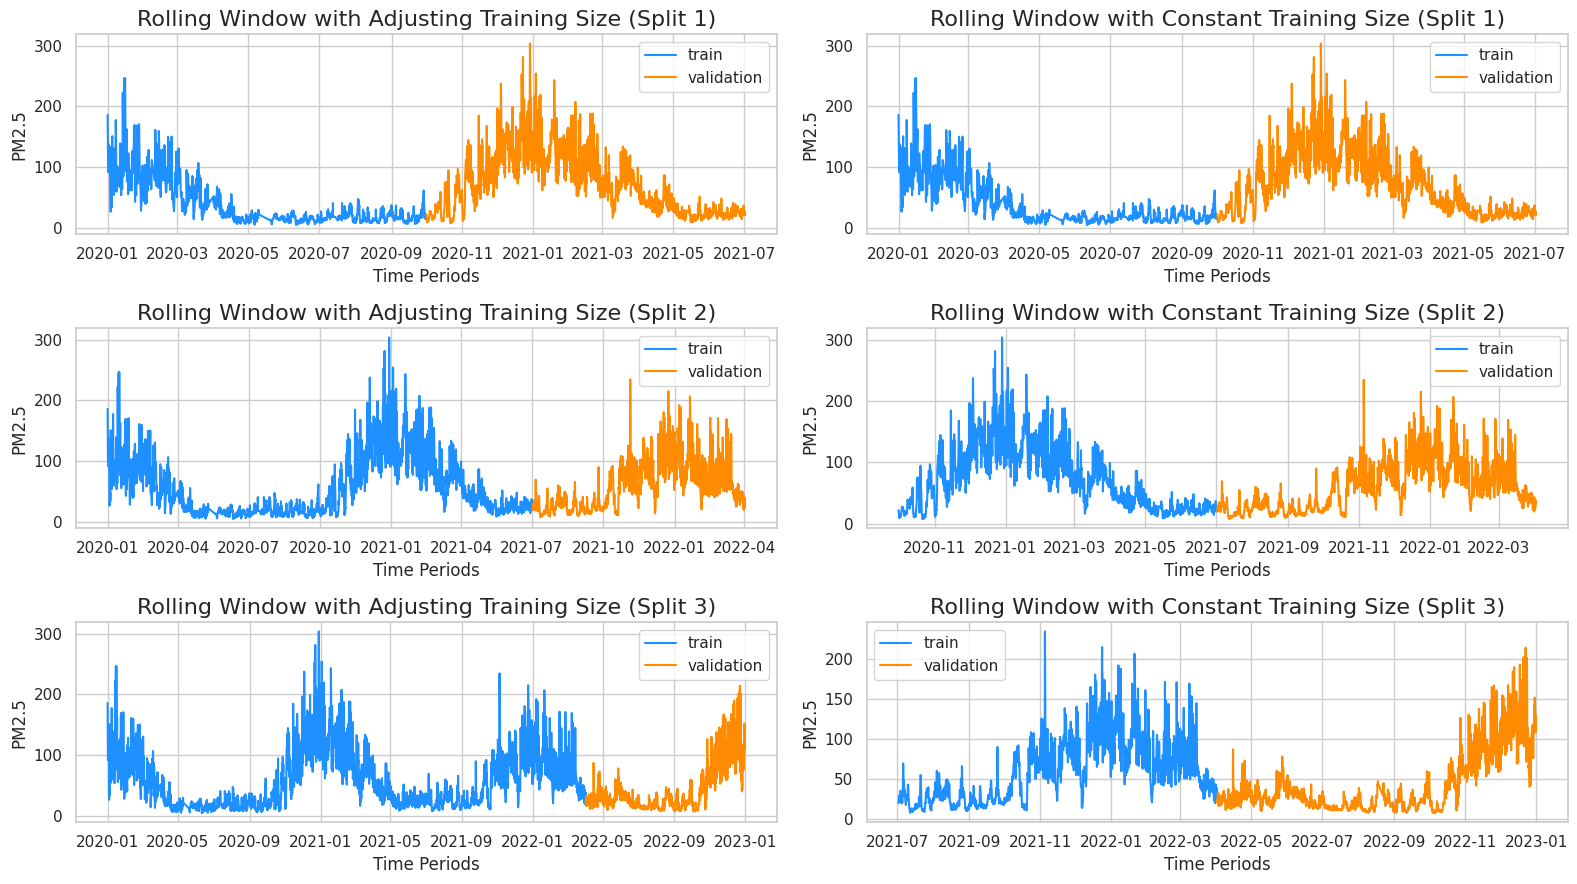

In [88]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

# for i in range(N_SPLITS):
#     ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
#     ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

In [89]:
train_size = int(0.85 * len(df_['Kolkata']))
test_size = len(df) - train_size

univariate_df = df_['Kolkata'][['Time Periods', 'PM2.5']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

5589 987


In [90]:
from colorama import Fore

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from prophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

17:23:27 - cmdstanpy - INFO - Chain [1] start processing
17:23:28 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 25.01975902308514


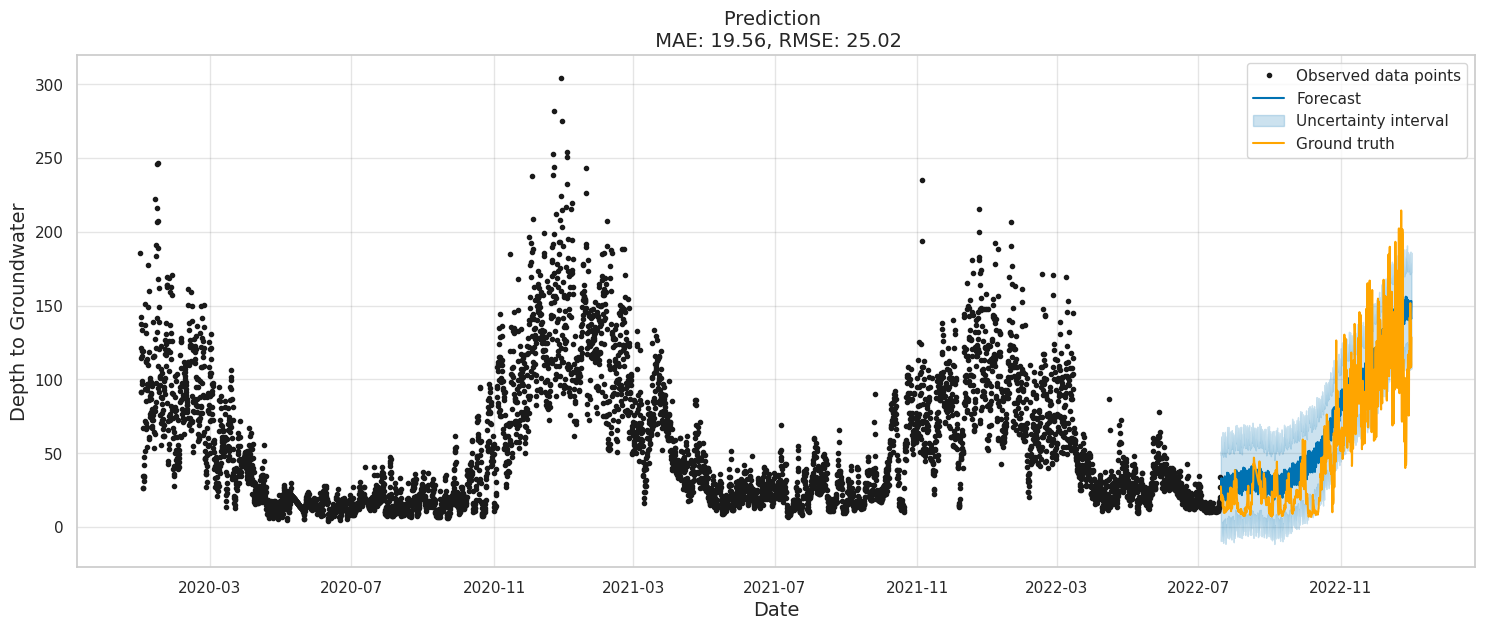

In [92]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### Arima <a class="anchor" id="section_3_4"></a>

In [96]:
# from statsmodels.tsa.arima.model import ARIMA

# # Fit model
# model = ARIMA(y_train, order=(1,1,1))
# model_fit = model.fit()

# # Prediction with ARIMA
# # y_pred, se, conf = model_fit.forecast()
# y_pred = model_fit.forecast(987)

# # Calcuate metrics
# score_mae = mean_absolute_error(y_valid, y_pred)
# score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

# print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

In [95]:
# f, ax = plt.subplots(1)
# f.set_figheight(6)
# f.set_figwidth(15)

# from statsmodels.graphics.tsaplots import plot_predict


# plot_predict(model_fit, 1, 599, ax=ax)

# # model_fit.plot_predict(1, 599, ax=ax)
# sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

# ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
# ax.set_xlabel(xlabel='Date', fontsize=14)
# ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

# ax.set_ylim(-35, -18)
# plt.show()

### PDARIMA <a class="anchor" id="section_3_5"></a>

In [ ]:
# !pip install pmdarima;

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# import pmdarima as pm

# model = pm.auto_arima(y_train, start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())

In [98]:
# model.plot_diagnostics(figsize=(16,8))
# plt.show()

### LSTM <a class="anchor" id="section_3_6"></a>

In [ ]:
train_size = int(0.85 * len(df_['Kolkata']))
test_size = len(df) - train_size

univariate_df = df_['Kolkata'][['Time Periods', 'PM2.5']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

In [ ]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50,activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50,activation='relu', return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2, validation_data=(x_test, y_test))

model.summary()

NameError: name 'x_train' is not defined

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=2, validation_data=(x_test, y_test))

model.summary()

In [ ]:
# bidirectional model
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

In [ ]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(987)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### Final Model <a class="anchor" id="section_3_7"></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128,activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64,activation='relu', return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

# Results <a class="anchor" id="chapter4"></a>

In [ ]:
list_cities = ["Delhi","Faridabad", "Ghaziabad", "Patna", "Muzaffarpur"]
list_pm25_values = [99.7, 95.6, 91.3, 90.9, 86.9]
df = pd.DataFrame(columns=["City", "ANNUAL_PM_2.5"])
df.loc[0] = ["Delhi", 99.7]
df.loc[1] = ["Faridabad", 95.6]
df.loc[2] = ["Ghaziabad", 91.3]
df.loc[3] = ["Patna", 90.8]
df.loc[4] = ["Muzaffarpur", 86.9]
# df.head()
plt.figure(figsize=(20,10))
sns.barplot(x='City', y='ANNUAL_PM_2.5', data=df, color='blue', width = 0.3)
plt.title('PM2.5 Level of Top 5 Cities', fontsize = 20)
plt.ylabel('PM2.5 Level', fontsize = 20)
plt.xlabel('City', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

# Methodology <a class="anchor" id="chapter5"></a>


1. Data Preparation:
   - Loaded the dataset into a Pandas DataFrame for further analysis.
   - Conducted exploratory data analysis (EDA) to understand the distribution, missing values, and outliers in the dataset.
   - Handled missing values by interpolation and impact on the model.
   - Checked for outliers and removed extreme values.

2. Feature Engineering:
   - Extracted relevant features from the dataset, such as date and time components, to capture temporal patterns.
   - Created lag features by shifting the target variable to incorporate historical information.
   - Encoded categorical variables using techniques like one-hot encoding or label encoding if necessary. (For visualization purposes)

3. Data Split:
   - Split the dataset into training and testing sets. Due to the time series nature of the data, a chronological split was used to maintain the temporal order.

4. Model Development:
   - Tried multiple models, like FbProphet, ARIMA, ThymeBoost etc.
   - The final model that we proceeded to move forward was with LSTM
   - Implemented an LSTM (Long Short-Term Memory) model using TensorFlow, a deep learning library.
   - Constructed the LSTM architecture, including input and hidden layers.
   - Experimented with different hyperparameters such as the number of LSTM layers, the number of hidden units, and the learning rate.
   - Trained the LSTM model on the training set and validated its performance using the testing set.

5. Model Evaluation:
   - Evaluated the performance of the LSTM model using various metrics, including mean absolute error (MAE), root mean square error (RMSE), and Mean Absolute Percentage error.
   - Compared the predicted PM2.5 values with the actual values using visualizations, such as line plots, to assess the model's accuracy and identify any discrepancies.

### Conclusion
The methodology employed a systematic approach to solving the air quality prediction challenge. It involved data preparation, feature engineering, LSTM model development, evaluation, and deployment. By following this methodology and leveraging the power of Python libraries, we were able to build an accurate LSTM model for PM2.5 prediction.


# Analysis <a class="anchor" id="chapter6"></a>

## Technical <a class="anchor" id="section_6_1"></a>

### Introduction
In this challenge, we were provided with data on air quality for various factors and tasked with predicting the PM2.5 value. To accomplish this, we utilized a time series modeling approach and leveraged the power of Python libraries such as NumPy, Pandas, Seaborn, Matplotlib, Scikit-learn, and TensorFlow.

### Data Exploration
We began by exploring the provided dataset using Pandas, which allowed us to gain insights into the structure and content of the data. We visualized the data using Seaborn and Matplotlib to identify patterns, trends, and potential correlations between variables.

### Data Preprocessing
Before feeding the data into our LSTM model, we performed necessary preprocessing steps. This included handling missing values, handling outliers, and scaling the data to ensure optimal model performance. Pandas and Scikit-learn were instrumental in carrying out these preprocessing tasks.

### LSTM Model Development
Given the time series nature of the data, We tried multiple models and finally we opted to use an LSTM (Long Short-Term Memory) model, a type of recurrent neural network (RNN) that can capture temporal dependencies effectively. TensorFlow was employed to construct and train the LSTM model. We experimented with different hyperparameters, such as the number of LSTM layers, the number of hidden units, and the learning rate, to optimize the model's performance.

### Model Evaluation
To evaluate the LSTM model's performance, we employed various metrics, including mean absolute error (MAE), root mean square error (RMSE), and mean absolute percentage error. We also visualized the predicted PM2.5 values against the actual values using line plots and scatter plots. The model's performance was assessed based on these metrics and visualizations.

### Conclusion
After extensive experimentation, the LSTM model emerged as the most accurate in predicting the PM2.5 values. It showcased strong performance metrics, such as low MAE and RMSE, and a low mean absolute percentage error. This model can be used to forecast PM2.5 values based on the given air quality factors, providing valuable insights for air quality management and decision-making processes.

## Business Analysis <a class="anchor" id="section_6_2"></a>

### Importance of Air Quality Prediction
Accurate prediction of PM2.5 values is crucial for several stakeholders, including environmental agencies, health organizations, and urban planners. Reliable air quality forecasts enable timely interventions, such as pollution control measures, public health warnings, and urban development strategies. By leveraging advanced analytics and machine learning models like the LSTM, we can empower these stakeholders with actionable insights.

### Potential Use Cases
1. Environmental Agencies: Air quality predictions can assist environmental agencies in monitoring pollution levels, identifying high-risk areas, and implementing targeted interventions to mitigate pollution.
2. Health Organizations: Accurate PM2.5 forecasts can help health organizations anticipate periods of poor air quality, enabling them to issue health advisories and educate vulnerable populations about potential health risks.
3. Urban Planners: Predictive models can aid urban planners in making informed decisions about infrastructure development, traffic management, and green spaces to improve air quality and create healthier living environments.

### Business Benefits
1. Cost Savings: Effective air quality predictions can lead to cost savings by optimizing pollution control efforts and reducing health-related expenditures.
2. Public Health Improvement: Timely warnings and interventions can protect public health, reduce the incidence of respiratory diseases, and improve the overall well-being of communities.
3. Sustainable Urban Development: Accurate air quality forecasts support sustainable urban planning, enabling the creation of cities with improved air quality, livability, and environmental sustainability.

### Conclusion
By harnessing the power of data analytics and employing advanced machine learning techniques like the LSTM model, we can make significant strides in predicting air quality, particularly the PM2.5 values. The technical analysis showcased the effectiveness of the LSTM model in accurately forecasting PM2.5 values based on the provided air quality factors. This has implications for various stakeholders, including environmental agencies, health organizations, and urban planners.

From a business perspective, the ability to predict air quality brings numerous benefits. It enables environmental agencies to monitor and address pollution more effectively, health organizations to issue timely warnings and protect public health, and urban planners to make informed decisions regarding infrastructure development. These benefits include cost savings, improved public health, and sustainable urban development.

Overall, the combination of advanced analytics, machine learning models, and accurate air quality predictions opens up opportunities for better air quality management, healthier communities, and more sustainable cities.




In [1]:
pip install nb2xls

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/152.7 kB ? eta -:--:--
     --                                       10.2/152.7 kB ? eta -:--:--
     ---------                             41.0/152.7 kB 653.6 kB/s eta 0:00:01
     --------------                        61.4/152.7 kB 656.4 kB/s eta 0:00:01
     ----------------------------         122.9/152.7 kB 722.1 kB/s eta 0:00:01
     ------------------------------------ 152.7/152.7 kB 701.5 kB/s eta 0:00:00
                                              0.0/58.1 kB ? eta -:--:--
     ---------------------------------------- 58.1/58.1 kB ? eta 0:00:00
                                              0.0/10.6 MB 

In [2]:
jupyter nbconvert --to xls exl_notebook_xlx/exl_notebook.ipynb

SyntaxError: invalid syntax (586730031.py, line 1)